In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline
from datetime import datetime


# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('../new_dataset/Texas_Intake_and_Outcome.csv')
df1.head(5)

,Animal ID,Name_intakes,DateTime_intakes,MonthYear_intakes,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,...,DateTime_outcomes,MonthYear_outcomes,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
0,A664887,*Gia,10/10/2013 01:48:00 PM,October 2013,1901 Onion Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,...,11/10/2013 04:56:00 PM,Nov 2013,08/10/2013,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Black
1,A665496,Mikey,10/18/2013 06:07:00 PM,October 2013,12001 Metric Blvd in Austin (TX),Stray,Normal,Cat,Neutered Male,3 years,...,10/22/2013 05:54:00 PM,Oct 2013,04/18/2010,Adoption,NaN,Cat,Neutered Male,3 years,Bengal,Brown Tiger
2,A664936,*Jester,10/11/2013 11:20:00 AM,October 2013,501 U.S. 183 in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,12/18/2013 06:18:00 PM,Dec 2013,08/18/2013,Adoption,NaN,Cat,Neutered Male,4 months,Domestic Medium Hair Mix,Brown Tabby
3,A665398,Haven,10/17/2013 12:26:00 PM,October 2013,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,...,11/10/2013 04:45:00 PM,Nov 2013,08/19/2013,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair Mix,White/Blue
4,A665426,Silka,10/17/2013 04:53:00 PM,October 2013,8224 Research Blvd #244 in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,11/16/2013 05:09:00 PM,Nov 2013,08/26/2013,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [3]:
# List of columns to drop outcome subtype is dropped because getting rid 
#of the nulls for it takes wayyyyy too many samples and it doesnt really matter because
#we have outcome type as adoption UNLESS YOU WANT TO THINK OF OUTCOME SUBTYPE = FOSTER AS NOT REAL ADOPTION
#OUTCOME SUBTYPE IS MOSTLY EMPTY BECAUSE SOMETIMES THEY ARE ADOPTED AND THATS IT
columns_to_drop = ['Found Location', 'Animal Type_intakes', 'Name_intakes',
                   'Name_outcomes','Breed_outcomes','Color_outcomes','Animal Type_outcomes',
                   'MonthYear_intakes','MonthYear_outcomes','Outcome Subtype']

# Drop the specified columns
df1.drop(columns=columns_to_drop, inplace=True)

In [4]:
df1.tail()

,Animal ID,DateTime_intakes,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,DateTime_outcomes,Date of Birth,Outcome Type,Sex upon Outcome,Age upon Outcome
28740,A796115,05/29/2019 11:04:00 AM,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Brown Tabby,06/04/2019 05:27:00 PM,03/29/2019,Adoption,Spayed Female,2 months
28741,A892826,11/11/2023 09:32:00 AM,Stray,Normal,Intact Male,11 months,Domestic Shorthair,White/Gray,11/27/2023 05:14:00 PM,12/11/2022,Adoption,Neutered Male,11 months
28742,A885026,07/12/2023 11:49:00 AM,Stray,Neonatal,Intact Male,4 days,Domestic Shorthair,Brown Tabby,09/25/2023 04:48:00 PM,07/08/2023,Adoption,Neutered Male,2 months
28743,A893396,11/20/2023 08:13:00 PM,Owner Surrender,Normal,Spayed Female,3 years,Domestic Shorthair,Calico,11/28/2023 04:19:00 PM,11/20/2020,Adoption,Spayed Female,3 years
28744,A891867,10/28/2023 02:26:00 PM,Stray,Normal,Intact Female,1 month,Domestic Shorthair,Blue Tabby,11/28/2023 05:39:00 PM,08/28/2023,Adoption,Spayed Female,3 months


In [5]:
columns_to_rename = {
    'DateTime_intakes': 'date_intake',
    'Intake Type': 'intake_type',
    'Intake Condition': 'intake_condition',
    'Sex upon Intake': 'sex_intake',
    'Age upon Intake': 'age_intake',
    'Breed_intakes':'breed',
    'Color_intakes':'color',
    'DateTime_outcomes':'date_outcome',
    'Date of Birth':'dob',
    'Outcome Type':'outcome_type',
    'Outcome Subtype':'outcome_subtype',
    'Sex upon Outcome':'sex_outcome',
    'Age upon Outcome':'age_outcome'
    
}

# Rename the specified columns
df1.rename(columns=columns_to_rename, inplace=True)

In [6]:
#i dropped duplicate ids on before joining them, dont drop duplicates because cats have same names or dates and we might lose samples
df1.duplicated().sum()

0

In [7]:
df1.isnull().sum()

Animal ID           0
date_intake         0
intake_type         0
intake_condition    0
sex_intake          0
age_intake          0
breed               0
color               0
date_outcome        0
dob                 0
outcome_type        0
sex_outcome         0
age_outcome         0
dtype: int64

In [8]:
df1.dropna(inplace=True)

In [9]:
df1.isnull().sum()

Animal ID           0
date_intake         0
intake_type         0
intake_condition    0
sex_intake          0
age_intake          0
breed               0
color               0
date_outcome        0
dob                 0
outcome_type        0
sex_outcome         0
age_outcome         0
dtype: int64

In [10]:
df1.tail()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome
28740,A796115,05/29/2019 11:04:00 AM,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Brown Tabby,06/04/2019 05:27:00 PM,03/29/2019,Adoption,Spayed Female,2 months
28741,A892826,11/11/2023 09:32:00 AM,Stray,Normal,Intact Male,11 months,Domestic Shorthair,White/Gray,11/27/2023 05:14:00 PM,12/11/2022,Adoption,Neutered Male,11 months
28742,A885026,07/12/2023 11:49:00 AM,Stray,Neonatal,Intact Male,4 days,Domestic Shorthair,Brown Tabby,09/25/2023 04:48:00 PM,07/08/2023,Adoption,Neutered Male,2 months
28743,A893396,11/20/2023 08:13:00 PM,Owner Surrender,Normal,Spayed Female,3 years,Domestic Shorthair,Calico,11/28/2023 04:19:00 PM,11/20/2020,Adoption,Spayed Female,3 years
28744,A891867,10/28/2023 02:26:00 PM,Stray,Normal,Intact Female,1 month,Domestic Shorthair,Blue Tabby,11/28/2023 05:39:00 PM,08/28/2023,Adoption,Spayed Female,3 months


In [11]:
# Convert them to datetime format
df1['date_intake'] = pd.to_datetime(df1['date_intake'])
df1['date_outcome'] = pd.to_datetime(df1['date_outcome'])

# Calculate the stay_length by subtracting intake_date from outcome_date
df1['stay_length'] = (df1['date_outcome'] - df1['date_intake']).dt.days

In [12]:
df1.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30


## Data visualization and cleaning for 'stay_length'

### the below sectionsection is very chaotic (in summary I have used 'Visual Inspection' & 'IQR method to clean  'stay_length' data column ⬇︎⬇︎

In [13]:
df_check = df1.copy()
df_check.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30


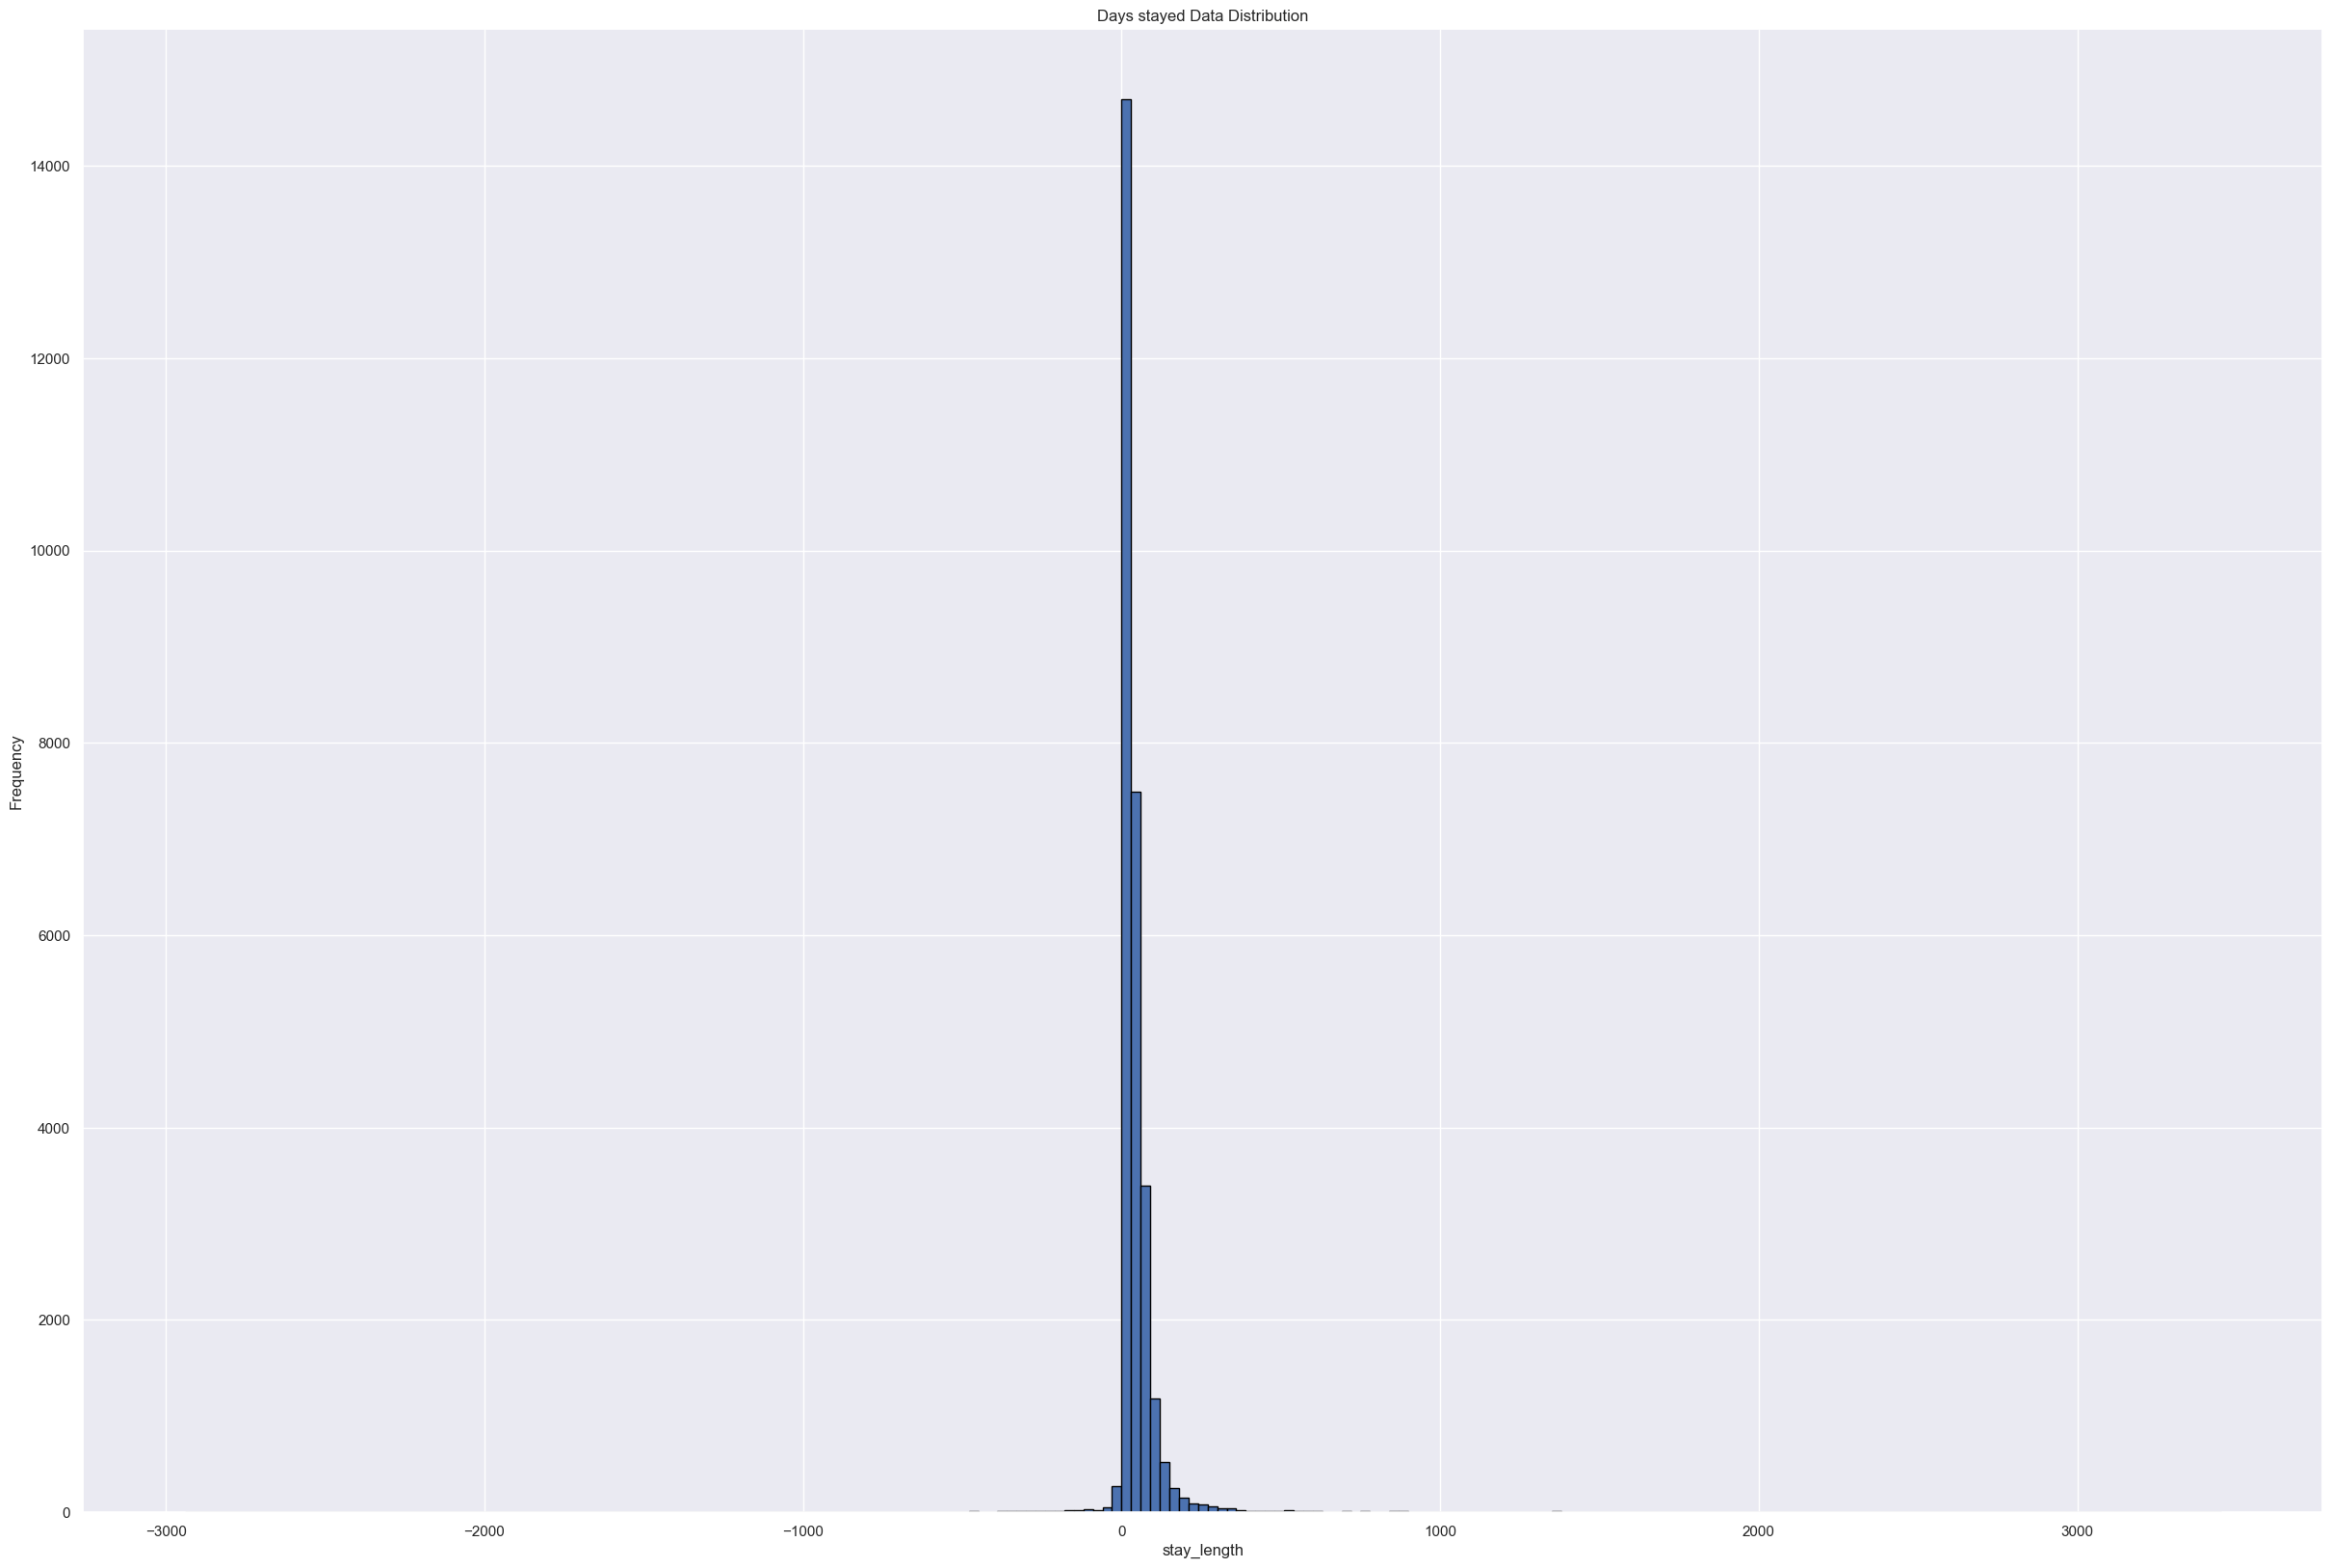

In [14]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(df_check['stay_length']) / bin_width) * bin_width)
max_value = int(np.ceil(max(df_check['stay_length']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

df_check['stay_length'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# Adding labels and title
plt.xlabel('stay_length')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [15]:
print(df_check['stay_length'].min(),df_check['stay_length'].max())

-2928 3445


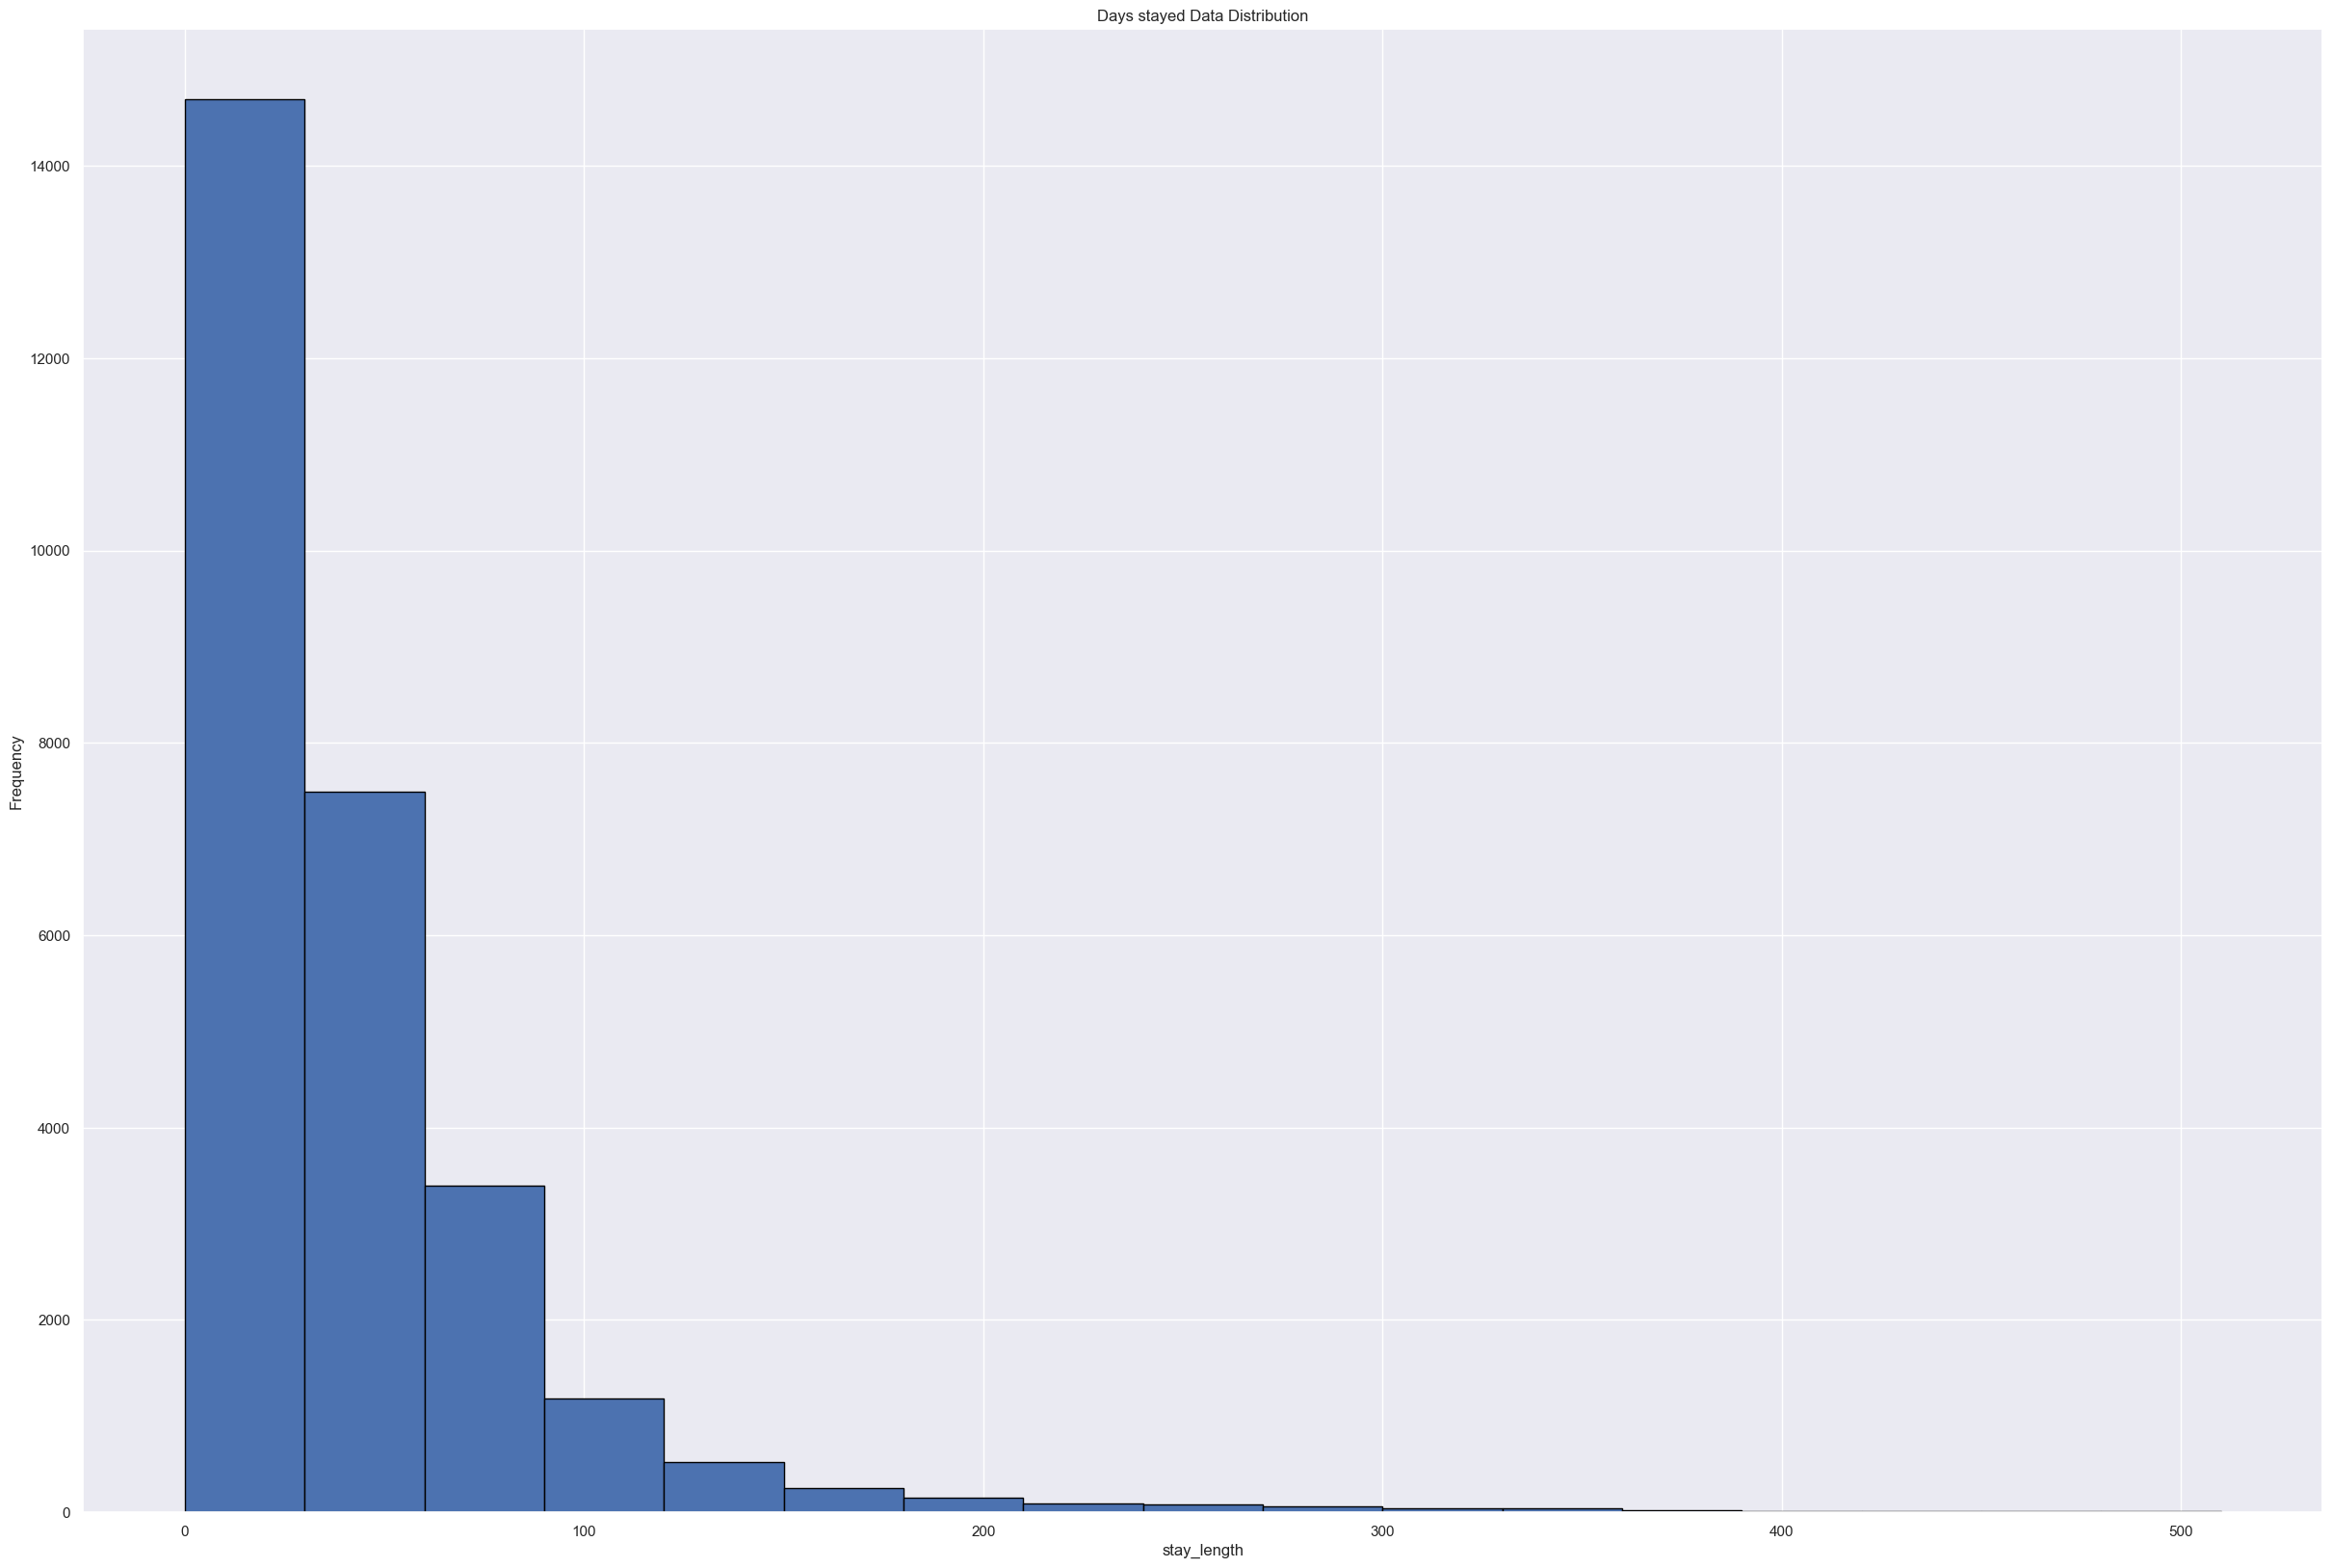

In [16]:
df_check2 = df_check[(df_check['stay_length']>=0) & (df_check['stay_length']<500)]
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(df_check2['stay_length']) / bin_width) * bin_width)
max_value = int(np.ceil(max(df_check2['stay_length']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

df_check2['stay_length'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('stay_length')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [17]:
category_counts = df_check2['stay_length'].value_counts()
pd.set_option('display.max_rows', None)
category_counts_df = pd.DataFrame({'day': category_counts.index, 'Count': category_counts.values})

# Display the DataFrame
print(category_counts_df)
pd.reset_option('display.max_rows')

     day  Count
0      4   1935
1      5   1221
2      6   1101
3      7    978
4      8    740
5      3    719
6      9    564
7     10    517
8      2    514
9     11    447
10    12    415
11    14    413
12    13    389
13    15    363
14    37    310
15    16    309
16    28    308
17    31    307
18    24    307
19    35    306
20    39    304
21    34    303
22    17    303
23    21    299
24    29    296
25    32    291
26    33    291
27    27    285
28    38    285
29    20    285
30    40    281
31    25    281
32    41    280
33     1    278
34    18    277
35    30    276
36    22    273
37    44    273
38    42    271
39    26    268
40    46    268
41    19    266
42    23    264
43    36    263
44    43    255
45    49    241
46    48    237
47    56    233
48    47    227
49    53    220
50    52    213
51    50    211
52    54    204
53    45    203
54    51    195
55    58    192
56    61    190
57    55    187
58    62    187
59    57    185
60    63    183
61    59

In [18]:
# df_check3 = df_check2[df_check2['stay_length']<200]
# print(df_check3.shape)
# df_check3.head()

# Removing 'stay_length' outliers using IQR 

In [19]:
# summary_stats = selected_df['stay_length'].describe(percentiles=[0.25, 0.75])
# print(summary_stats[['25%', '75%']])
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_check2['stay_length'].quantile(0.25)
Q3 = df_check2['stay_length'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_check2['stay_length'] < lower_bound) | (df_check2['stay_length'] > upper_bound)

# Display the number of outliers
print("Number of outliers:", outliers.sum())

Number of outliers: 1210


In [20]:
cleaned_df = df_check2[~outliers]
cleaned_df_counts = cleaned_df['stay_length'].value_counts()
pd.set_option('display.max_rows', None)
cleaned_counts_df = pd.DataFrame({'day': cleaned_df_counts.index, 'Count': cleaned_df_counts.values})

# Display the DataFrame
print(cleaned_counts_df)
pd.reset_option('display.max_rows')

     day  Count
0      4   1935
1      5   1221
2      6   1101
3      7    978
4      8    740
5      3    719
6      9    564
7     10    517
8      2    514
9     11    447
10    12    415
11    14    413
12    13    389
13    15    363
14    37    310
15    16    309
16    28    308
17    24    307
18    31    307
19    35    306
20    39    304
21    34    303
22    17    303
23    21    299
24    29    296
25    32    291
26    33    291
27    38    285
28    27    285
29    20    285
30    25    281
31    40    281
32    41    280
33     1    278
34    18    277
35    30    276
36    44    273
37    22    273
38    42    271
39    26    268
40    46    268
41    19    266
42    23    264
43    36    263
44    43    255
45    49    241
46    48    237
47    56    233
48    47    227
49    53    220
50    52    213
51    50    211
52    54    204
53    45    203
54    51    195
55    58    192
56    61    190
57    62    187
58    55    187
59    57    185
60    63    183
61    59

In [21]:
# cleaned_df.to_csv('../test.csv', index=False)

In [22]:
cleaned_df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30


In [23]:
cleaned_df.shape

(26841, 14)

In [24]:
cleaned_df.shape

(26841, 14)

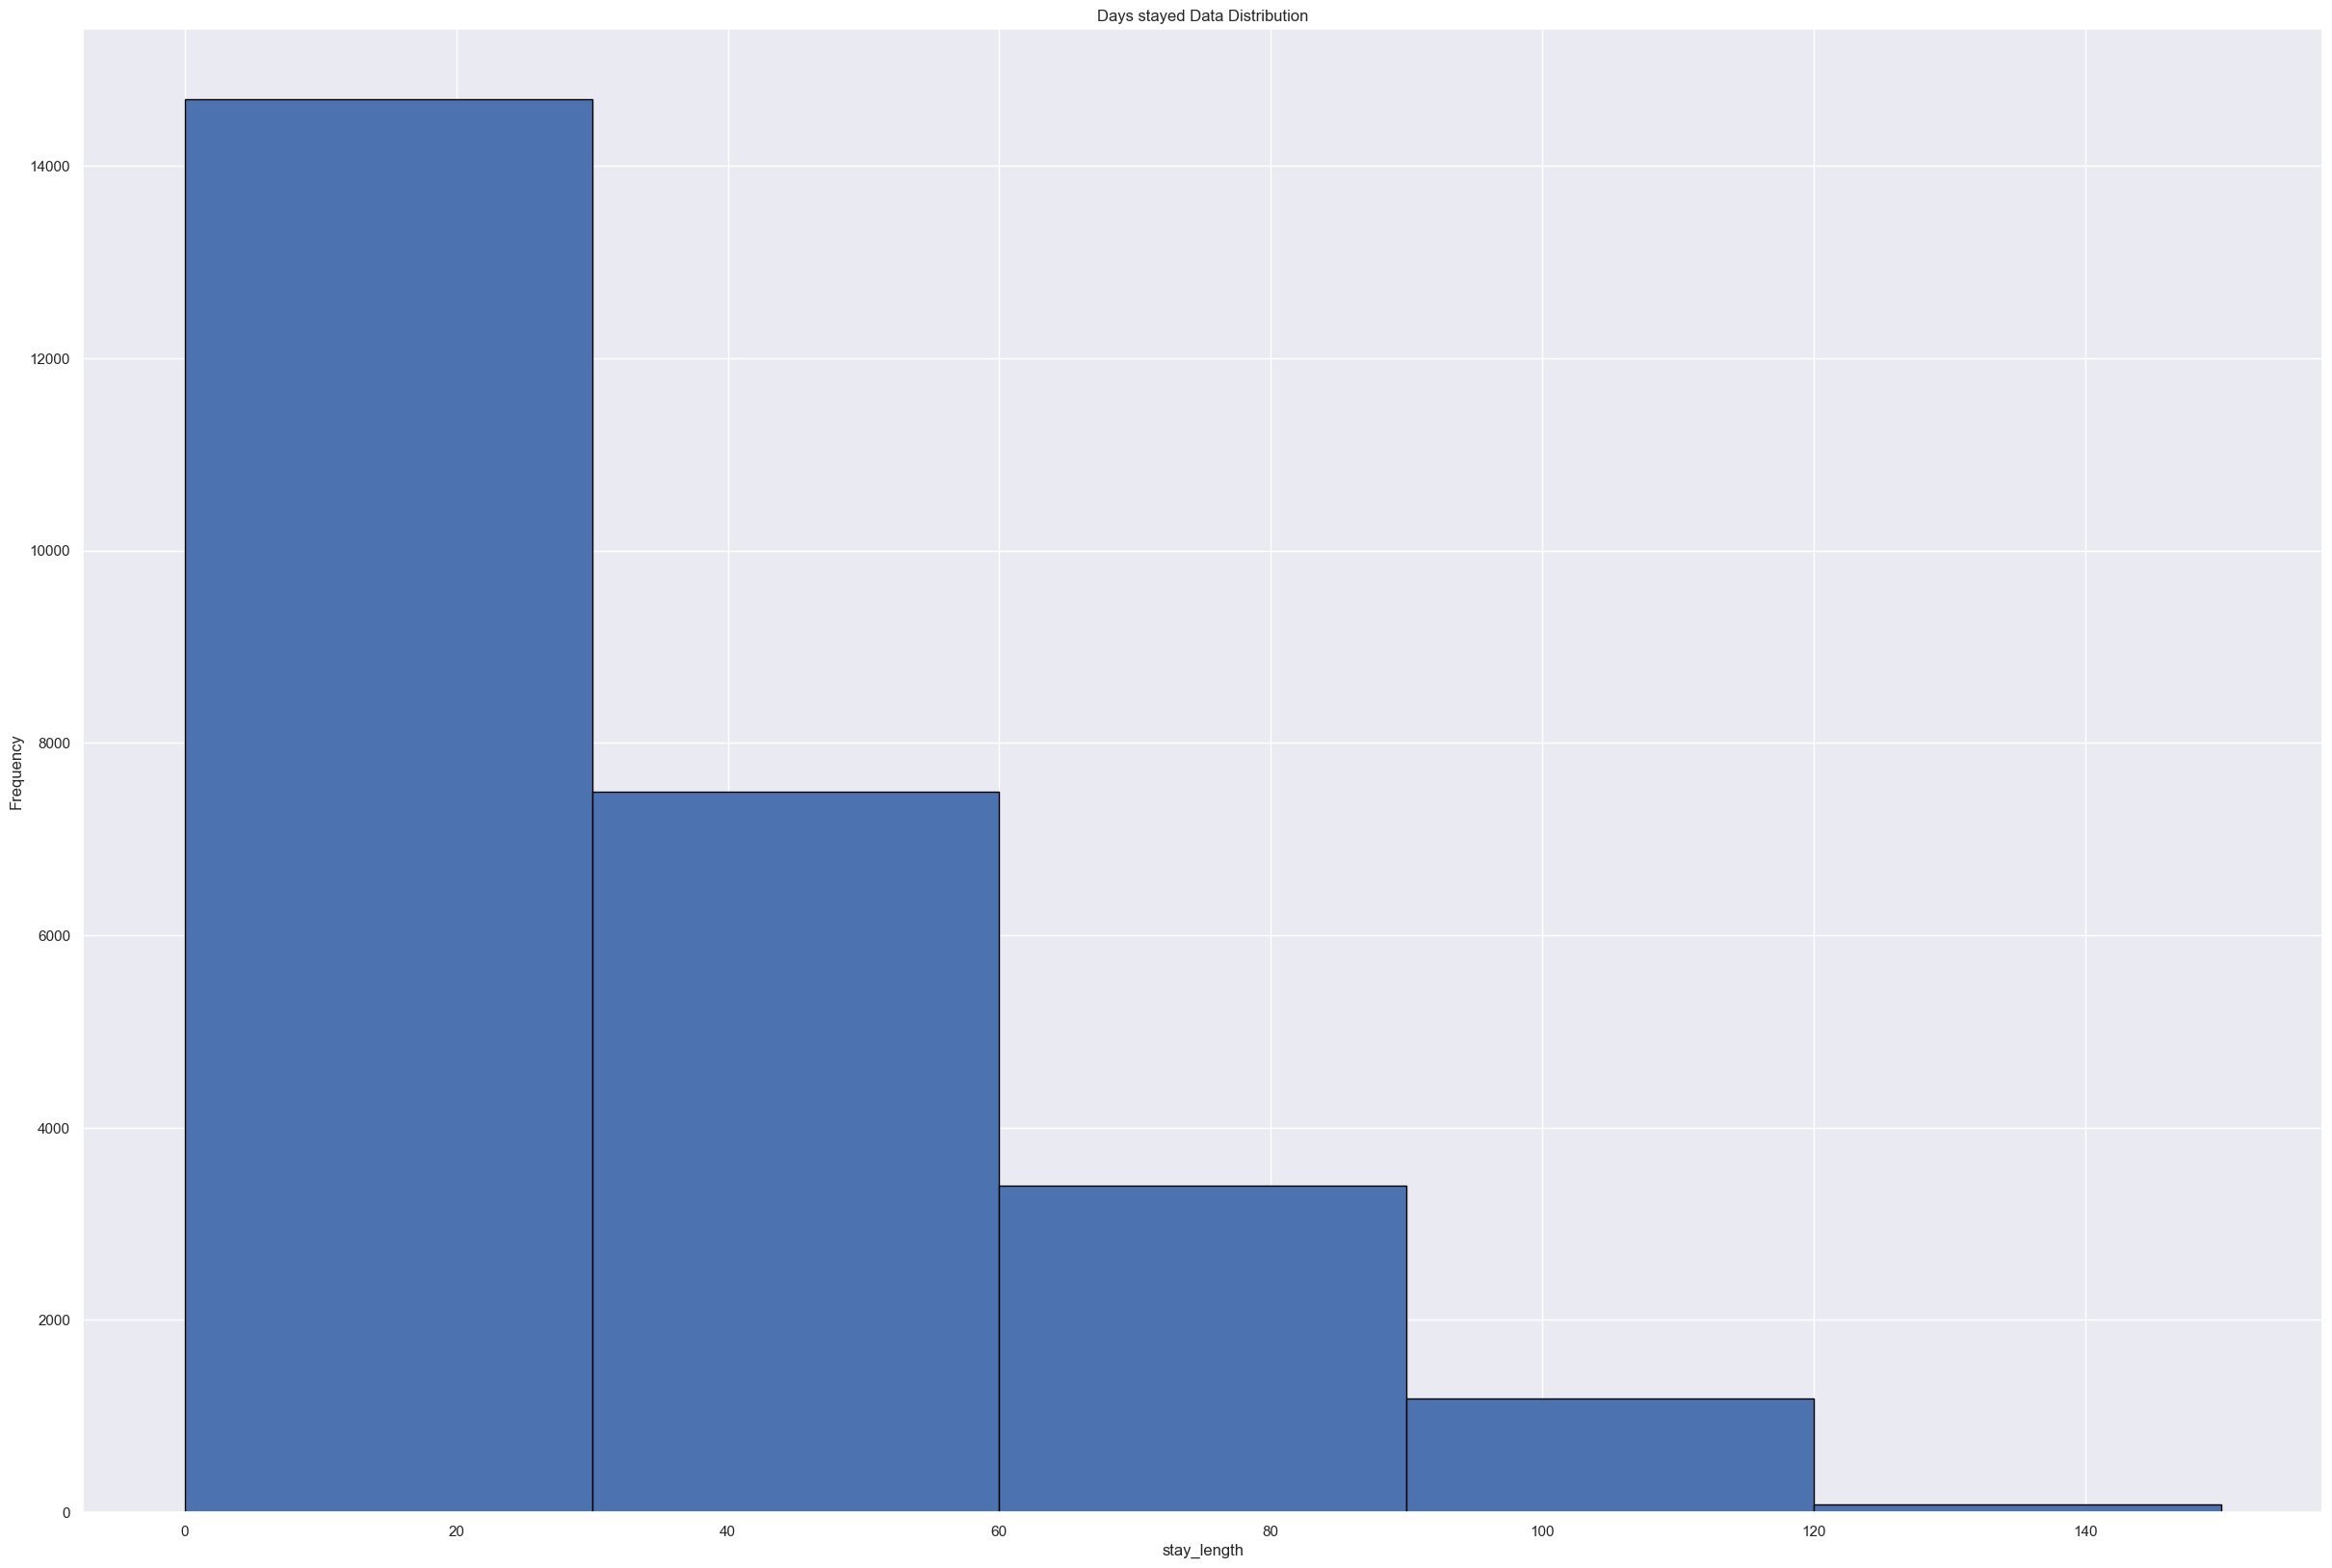

In [25]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(cleaned_df['stay_length']) / bin_width) * bin_width)
max_value = int(np.ceil(max(cleaned_df['stay_length']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

cleaned_df['stay_length'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# Adding labels and title
plt.xlabel('stay_length')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# Display the plot
plt.show()

In [26]:
df = cleaned_df[cleaned_df['stay_length']<=100]
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30


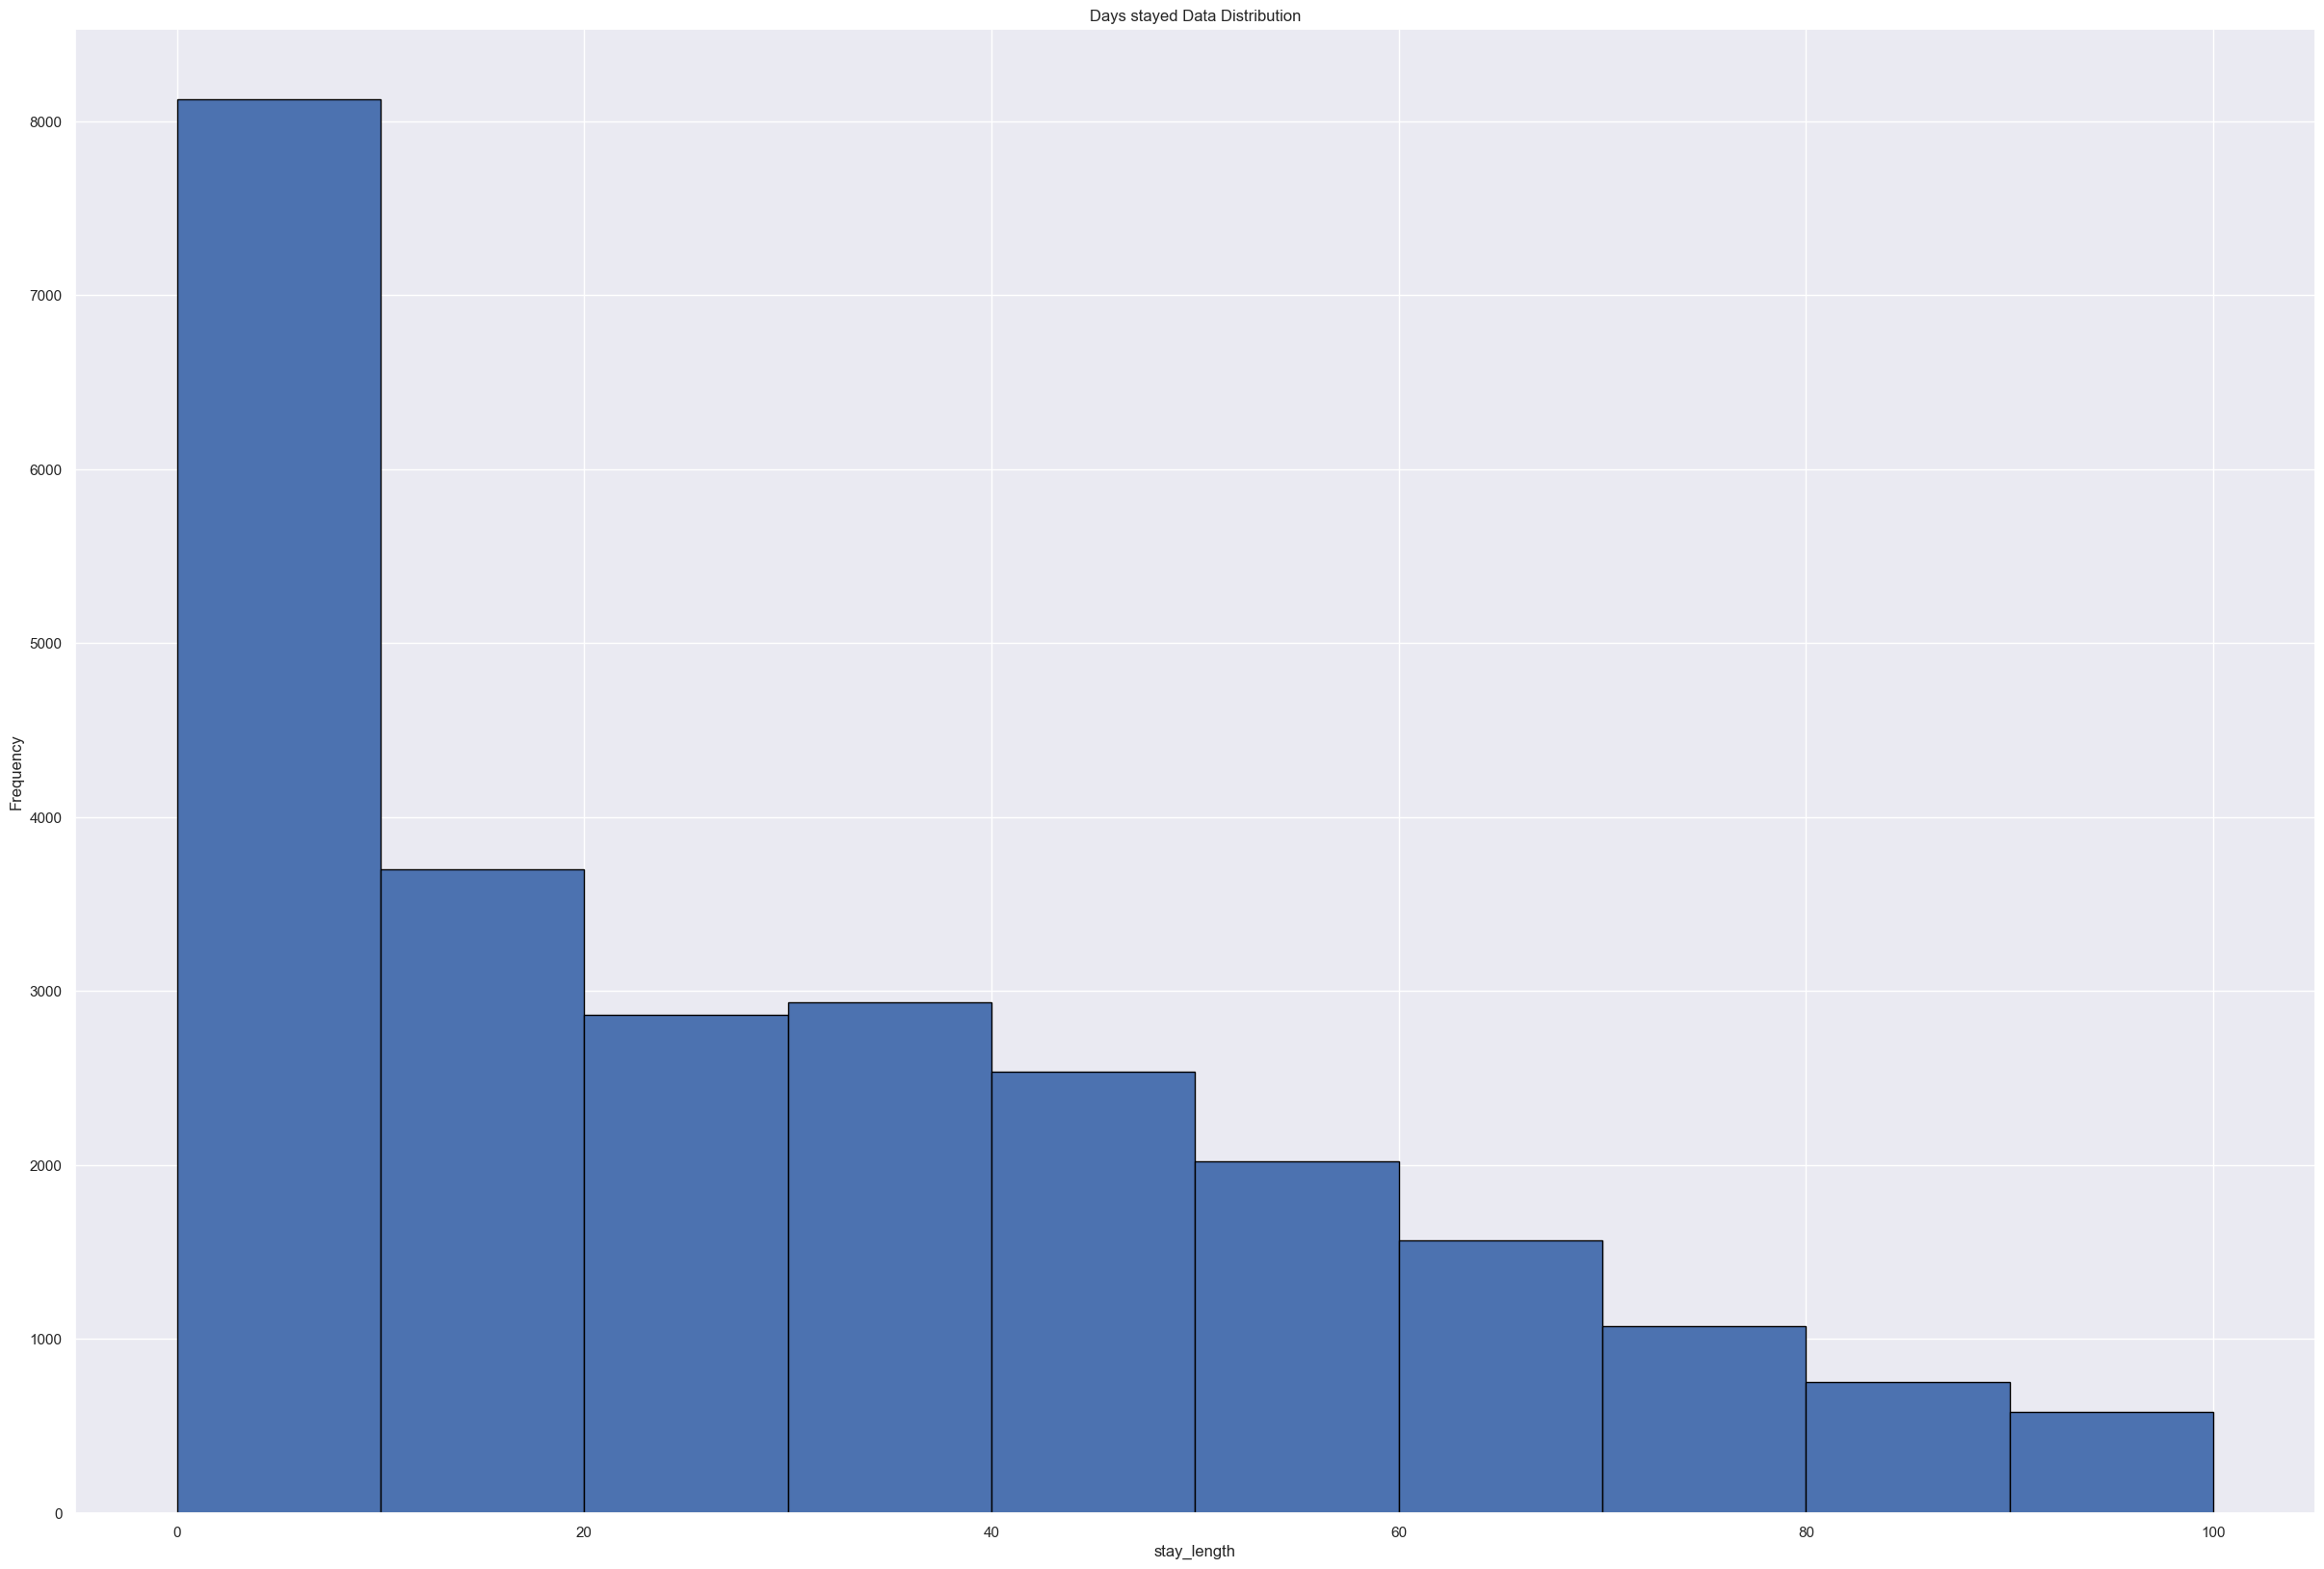

In [27]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 10  # Adjust this based on your preference
min_value = int(np.floor(min(df['stay_length']) / bin_width) * bin_width)
max_value = int(np.ceil(max(df['stay_length']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

df['stay_length'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# Adding labels and title
plt.xlabel('stay_length')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [28]:
# # ploting bar plot for days stayed column
# # Calculate bin edges programmatically
# bin_width = 10  # Adjust this based on your preference
# min_value = int(np.floor(min(df_check3['stay_length']) / bin_width) * bin_width)
# max_value = int(np.ceil(max(df_check3['stay_length']) / bin_width) * bin_width)
# bins = range(min_value, max_value + bin_width, bin_width)

# df_check3['stay_length'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# # Adding labels and title
# plt.xlabel('stay_length')
# plt.ylabel('Frequency')
# plt.title('Days stayed Data Distribution')

# # # Display the plot
# plt.show()

In [29]:
# df_check3.shape

In [30]:
# #i dropped duplicate ids on before joining them, dont drop duplicates because cats have same names or dates and we might lose samples
# df_check3.duplicated().sum()

In [31]:
# df_check3.isnull().sum()

In [32]:
# df= df_check3[df_check3['stay_length']<=150]
# df.head()

## the above section is very chaotic (in summary I have used 'Visual Inspection' & 'IQR method to clean  'stay_length' data column⬆︎⬆︎

# Simplifing the Color to Coat Color And Coat Pattern

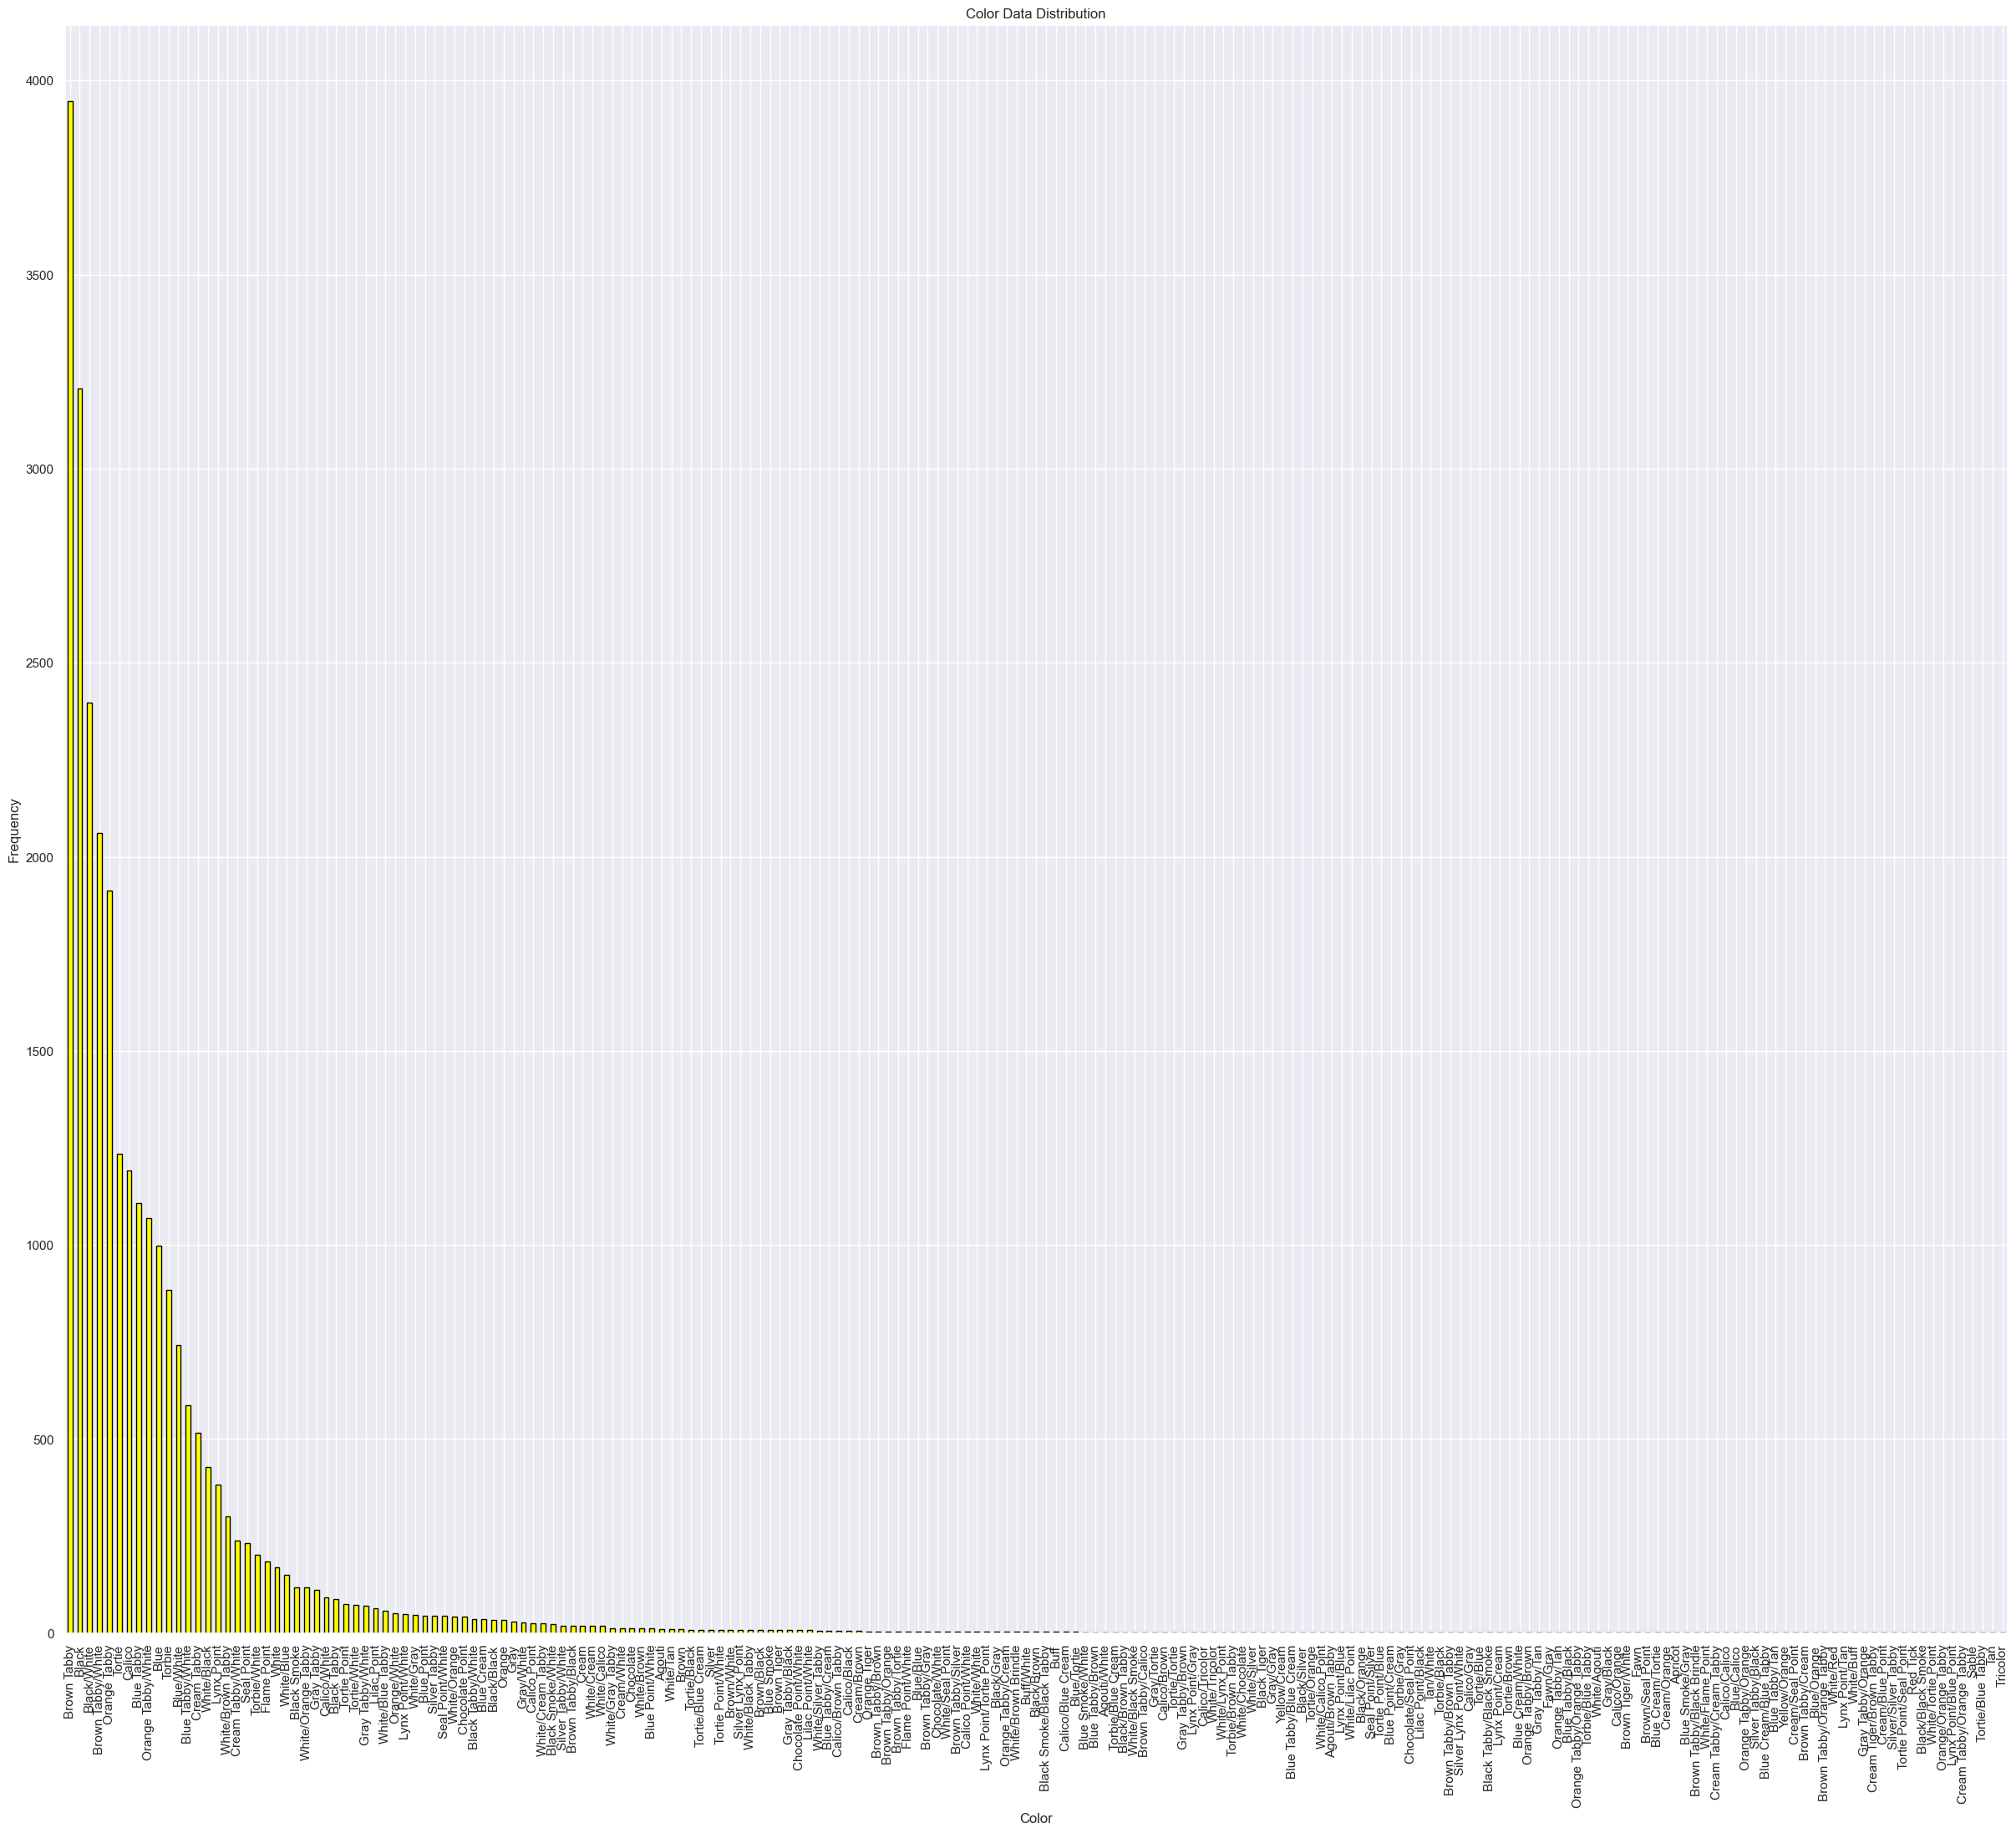

In [33]:
#ALL COLORS TOGETGER SO YOU CAN HAVE AN IDEA OF WHY I CHOSE ONLY THE FIRST WORD
category_counts = df['color'].value_counts()
category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

In [34]:


# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
category_counts = df['color'].value_counts()

# Convert the Series to a DataFrame for better display
category_counts_df = pd.DataFrame({'Color': category_counts.index, 'Count': category_counts.values})

# Display the DataFrame
print(category_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


                         Color  Count
0                  Brown Tabby   3946
1                        Black   3207
2                  Black/White   2397
3            Brown Tabby/White   2062
4                 Orange Tabby   1912
5                       Tortie   1235
6                       Calico   1192
7                   Blue Tabby   1107
8           Orange Tabby/White   1070
9                         Blue    998
10                      Torbie    884
11                  Blue/White    742
12            Blue Tabby/White    588
13                 Cream Tabby    517
14                 White/Black    428
15                  Lynx Point    382
16           White/Brown Tabby    300
17           Cream Tabby/White    238
18                  Seal Point    231
19                Torbie/White    201
20                 Flame Point    184
21                       White    170
22                  White/Blue    151
23                 Black Smoke    118
24          White/Orange Tabby    117
25          

# Separating Coat Color and pattern

In [35]:
# Assuming df is your DataFrame with the 'Color' column
# Create new columns 'CoatColor' and 'CoatPattern'

pd.set_option('display.max_rows', None)
df['CoatColor'] = df['color'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)
# df.loc[:,'CoatColor'] = df['CoatColor']

df['CoatPattern'] = df['color'].apply(lambda x: x.split(' ')[1] if ' ' in x else 'Solid')
# df.loc[:,'CoatPattern'] = df['CoatPattern']

# Display the DataFrame with new columns
print(df[['color', 'CoatColor', 'CoatPattern']].head(100))
pd.reset_option('display.max_rows')

                  color     CoatColor  CoatPattern
0                 Black         Black        Solid
1           Brown Tiger         Brown        Tiger
2           Brown Tabby         Brown        Tabby
3            White/Blue    White/Blue        Solid
4                 Black         Black        Solid
5           Black/White   Black/White        Solid
6                Calico        Calico        Solid
7           Black/White   Black/White        Solid
8                 Black         Black        Solid
10                Black         Black        Solid
11               Torbie        Torbie        Solid
12          Brown Tabby         Brown        Tabby
13               Tortie        Tortie        Solid
15          Brown Tabby         Brown        Tabby
16          Black/White   Black/White        Solid
17          Black/White   Black/White        Solid
18                Black         Black        Solid
19           Seal Point          Seal        Point
20               Tortie        

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/3470558550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatColor'] = df['color'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)
/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/3470558550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatPattern'] = df['color'].apply(lambda x: x.split(' ')[1] if ' ' in x else 'Solid')


In [36]:
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White/Blue,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [37]:
# def assign_color(input_string):
#     if 'Brown Tabby' in input_string:
#         return 'Brown Tabby'
#     elif 'Orange Tabby' in input_string:
#         return 'Orange Tabby'
#     elif 'Black/White' in input_string or 'White/Black' in input_string:
#         return 'BLACK_N_WHITE'
#     elif 'Gray/White' in input_string or 'White/Gray' in input_string:
#         return 'GRAY_N_WHITE'
#     elif 'Tortie' in input_string:
#         return 'Tortie'
#     elif 'Gray Tabby' in input_string:
#         return 'Gray Tabby'
#     elif 'Tabby' in input_string:
#         return 'OTHER_TABBY'
#     elif 'Black/Black' in input_string:
#         return 'BLACK'
# #     elif '/' in input_string or ' ' in input_string:
# #         return 'MIX'
#     else:
#         return input_string

# df['simplified_color'] = df['color'].apply(assign_color)

# df.head()


# Simplyfing Coat Color

In [38]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'CoatColor' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


          CoatColor  Count
0             Brown   6071
1             Black   3476
2            Orange   3026
3              Blue   2811
4       Black/White   2397
5            Tortie   1320
6            Calico   1222
7            Torbie    884
8             Cream    777
9        Blue/White    742
10             Lynx    439
11      White/Black    438
12      White/Brown    316
13             Seal    277
14             Gray    222
15       White/Blue    208
16     Torbie/White    201
17            Flame    188
18            White    170
19     White/Orange    160
20     Calico/White     93
21           Silver     84
22            Lilac     73
23     Tortie/White     73
24        Chocolate     62
25       White/Gray     59
26     Orange/White     51
27      White/Cream     44
28      Black/Black     34
29       Gray/White     27
30     White/Calico     20
31      Cream/White     13
32           Agouti     11
33      Tortie/Blue     11
34        White/Tan     10
35      Brown/White      9
3

## step 1

In [39]:
def assign_color(input_string):
    if 'Torbie' in input_string:
        return 'Torbie_or_Torbie_mix'
    if 'Tortie' in input_string:
        return 'Tortie_or_Tortie_mix'
    if 'Calico' in input_string:
        return 'Calico_or_Calico_mix'
    elif 'Black/Black' in input_string:
        return 'Black'
    elif 'Black/White' in input_string or 'White/Black' in input_string:
         return 'Black_N_White'
    elif '/White' in input_string or 'White/' in input_string:
         return 'White_Mix'
    elif 'Orange/Orange' in input_string:
        return 'Orange'
#     elif '/' in input_string or ' ' in input_string:
#         return 'MIX'
    else:
        return input_string

df['CoatColor'] = df['CoatColor'].apply(assign_color)
# df.loc[:,'CoatColor'] = df['CoatColor']


df.head()


/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/1622773666.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatColor'] = df['CoatColor'].apply(assign_color)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [40]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

               CoatColor  Count
0                  Brown   6071
1                  Black   3510
2                 Orange   3027
3          Black_N_White   2835
4                   Blue   2811
5              White_Mix   1676
6   Tortie_or_Tortie_mix   1424
7   Calico_or_Calico_mix   1358
8   Torbie_or_Torbie_mix   1092
9                  Cream    777
10                  Lynx    439
11                  Seal    277
12                  Gray    222
13                 Flame    188
14                 White    170
15                Silver     84
16                 Lilac     73
17             Chocolate     62
18                Agouti     11
19           Brown/Black      8
20           Black/Brown      5
21           Cream/Brown      5
22             Blue/Blue      4
23                  Buff      3
24            Black/Gray      3
25          Agouti/Brown      2
26          Yellow/Cream      2
27          Black/Silver      2
28             Gray/Gray      2
29          Black/Orange      1
30      

## Step 2

In [41]:
def assign_color(input_string):
    colors_to_check = ['Brown', 'Black', 'Orange', 'Black_N_White', 'Blue', 'White_Mix', 'Tortie_or_Tortie_mix', 'Calico_or_Calico_mix', 'Torbie_or_Torbie_mix']
    
    if '/' in input_string:
        return 'Other'
    elif any(color in input_string for color in colors_to_check):
        return input_string
    else:
        return 'Other'

df['CoatColor'] = df['CoatColor'].apply(assign_color)
# df.loc[:,'CoatColor'] = df['CoatColor']

df.head()

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/2739840353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatColor'] = df['CoatColor'].apply(assign_color)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [42]:
CoatColor_counts = df['CoatColor'].value_counts()
CoatColor_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatColor_counts = df['CoatColor'].value_counts()

# Convert the Series to a DataFrame for better display
CoatColor_counts_df = pd.DataFrame({'CoatColor': CoatColor_counts.index, 'Count': CoatColor_counts.values})

# Display the DataFrame
print(CoatColor_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

              CoatColor  Count
0                 Brown   6071
1                 Black   3510
2                Orange   3027
3         Black_N_White   2835
4                  Blue   2811
5                 Other   2356
6             White_Mix   1676
7  Tortie_or_Tortie_mix   1424
8  Calico_or_Calico_mix   1358
9  Torbie_or_Torbie_mix   1092


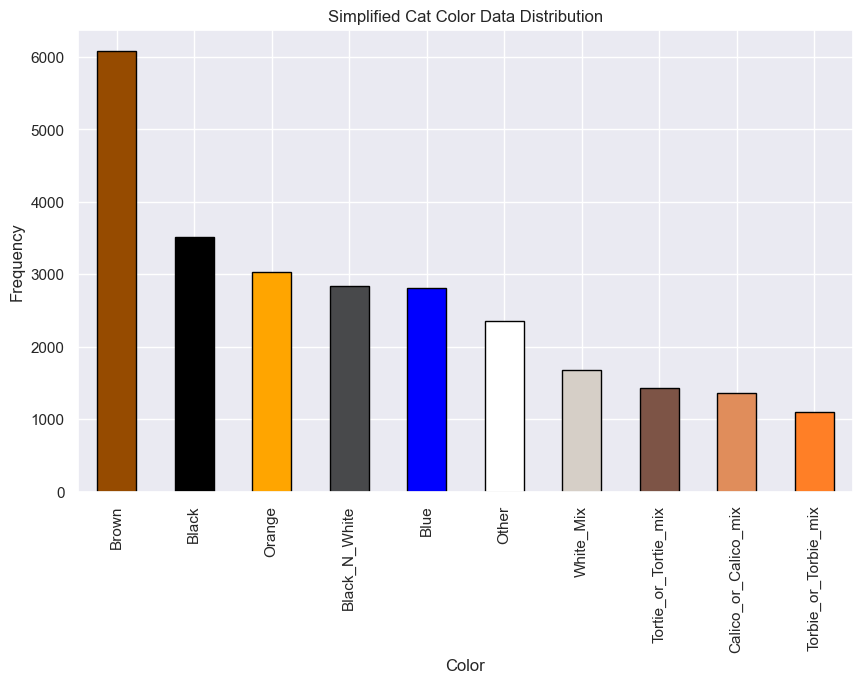

In [43]:
import matplotlib.pyplot as plt

# Assuming category_counts2 is your Series
# color_category_counts2 = pd.Series({'TABBY': 949, 'BLACK': 744, 'OTHER': 626, 'GRAY': 333, 'WHITE': 219})

# Create a color dictionary for each category
color_dict = {'Brown': '#964B00', 'Black': 'black', 'Orange': 'orange', 'Black_N_White':'#48494B', 'Blue': 'blue','White_Mix': '#D6CFC7', 'Tortie_or_Tortie_mix': '#7d5446', 'Calico_or_Calico_mix': '#e08d5b','Torbie_or_Torbie_mix': '#ff7f26', 'Other': 'white'}

# Plot the bar chart with specified colors
CoatColor_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in CoatColor_counts.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Color Data Distribution')

# Display the plot
plt.show()


# Simplyfing Coat Pattern

In [44]:
CoatPattern_counts = df['CoatPattern'].value_counts()
CoatPattern_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'CoatPattern' column
CoatPattern_counts = df['CoatPattern'].value_counts()

# Convert the Series to a DataFrame for better display
CoatPattern_counts_df = pd.DataFrame({'CoatPattern': CoatPattern_counts.index, 'Count': CoatPattern_counts.values})

# Display the DataFrame
print(CoatPattern_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


     CoatPattern  Count
0          Solid  12278
1          Tabby   8269
2    Tabby/White   4082
3          Point   1064
4    Point/White    136
5          Smoke    128
6          Cream     49
7    Tabby/Black     30
8    Smoke/White     25
9          Tiger     13
10   Tabby/Cream     11
11   Tabby/Brown     10
12          Lynx     10
13  Tabby/Orange      9
14  Tabby/Tortie      4
15    Tabby/Gray      4
16  Tabby/Silver      4
17    Point/Blue      3
18  Point/Tortie      3
19       Brindle      3
20   Smoke/Black      3
21     Tabby/Tan      3
22    Tabby/Blue      2
23   Point/Cream      2
24    Point/Gray      2
25  Tabby/Calico      2
26   Point/Black      1
27   Tiger/Brown      1
28   Tiger/White      1
29   Cream/White      1
30    Smoke/Gray      1
31    Point/Seal      1
32          Tick      1
33  Cream/Tortie      1
34    Cream/Blue      1
35     Point/Tan      1
36  Point/Silver      1


## step 1

In [45]:
def assign_CoatPattern(input_string):
    if 'Tabby' in input_string:
        return 'Tabby'
    elif 'Point' in input_string:
        return 'Point'
    else:
        return input_string

df['CoatPattern'] = df['CoatPattern'].apply(assign_CoatPattern)
# df.loc[:,'CoatPattern'] = df['CoatPattern']


df.head()


/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/2680355845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatPattern'] = df['CoatPattern'].apply(assign_CoatPattern)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Tiger
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [46]:
CoatPattern_counts = df['CoatPattern'].value_counts()
CoatPattern_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatPattern_counts = df['CoatPattern'].value_counts()

# Convert the Series to a DataFrame for better display
CoatPattern_counts_df = pd.DataFrame({'CoatPattern': CoatPattern_counts.index, 'Count': CoatPattern_counts.values})

# Display the DataFrame
print(CoatPattern_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

     CoatPattern  Count
0          Tabby  12430
1          Solid  12278
2          Point   1214
3          Smoke    128
4          Cream     49
5    Smoke/White     25
6          Tiger     13
7           Lynx     10
8    Smoke/Black      3
9        Brindle      3
10   Tiger/Brown      1
11   Cream/White      1
12    Cream/Blue      1
13          Tick      1
14  Cream/Tortie      1
15    Smoke/Gray      1
16   Tiger/White      1


## Step 2

In [47]:
def assign_CoatPattern(input_string):
    CoatPattern_to_check = ['Tabby', 'Solid']
    
    if any(pattern in input_string for pattern in CoatPattern_to_check):
        return input_string
    else:
        return 'Other'

df['CoatPattern'] = df['CoatPattern'].apply(assign_CoatPattern)
# df.loc[:,'CoatPattern'] = df['CoatPattern']

df.head()

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/3948579359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoatPattern'] = df['CoatPattern'].apply(assign_CoatPattern)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [48]:
CoatPattern_counts = df['CoatPattern'].value_counts()
CoatPattern_counts
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
CoatPattern_counts = df['CoatPattern'].value_counts()

# Convert the Series to a DataFrame for better display
CoatPattern_counts_df = pd.DataFrame({'CoatPattern': CoatPattern_counts.index, 'Count': CoatPattern_counts.values})

# Display the DataFrame
print(CoatPattern_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

  CoatPattern  Count
0       Tabby  12430
1       Solid  12278
2       Other   1452


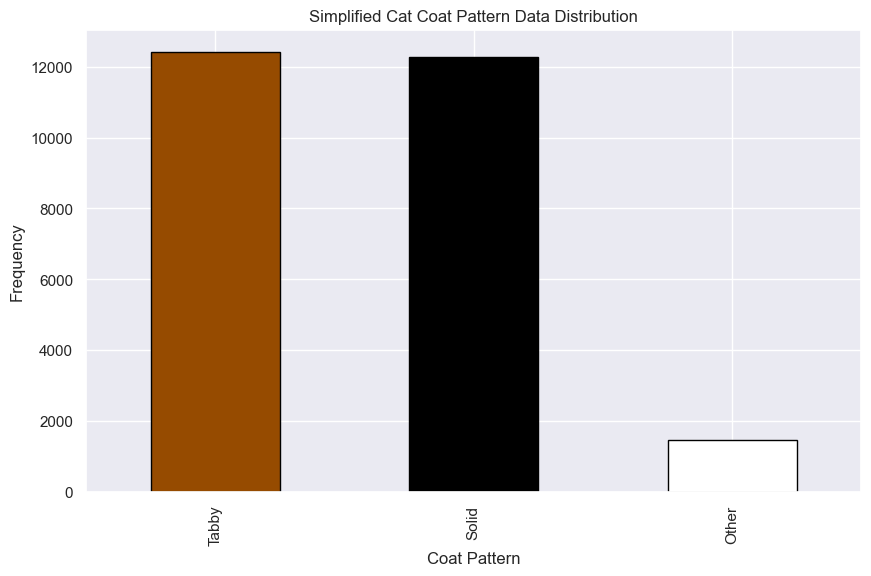

In [49]:

# Create a color dictionary for each category
color_dict = {'Tabby': '#964B00', 'Solid': 'black','Other': 'white'}

# Plot the bar chart with specified colors
CoatPattern_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in CoatPattern_counts.index])

# Adding labels and title
plt.xlabel('Coat Pattern')
plt.ylabel('Frequency')
plt.title('Simplified Cat Coat Pattern Data Distribution')

# Display the plot
plt.show()


# Cat Breed Data Cleaning & Visualization

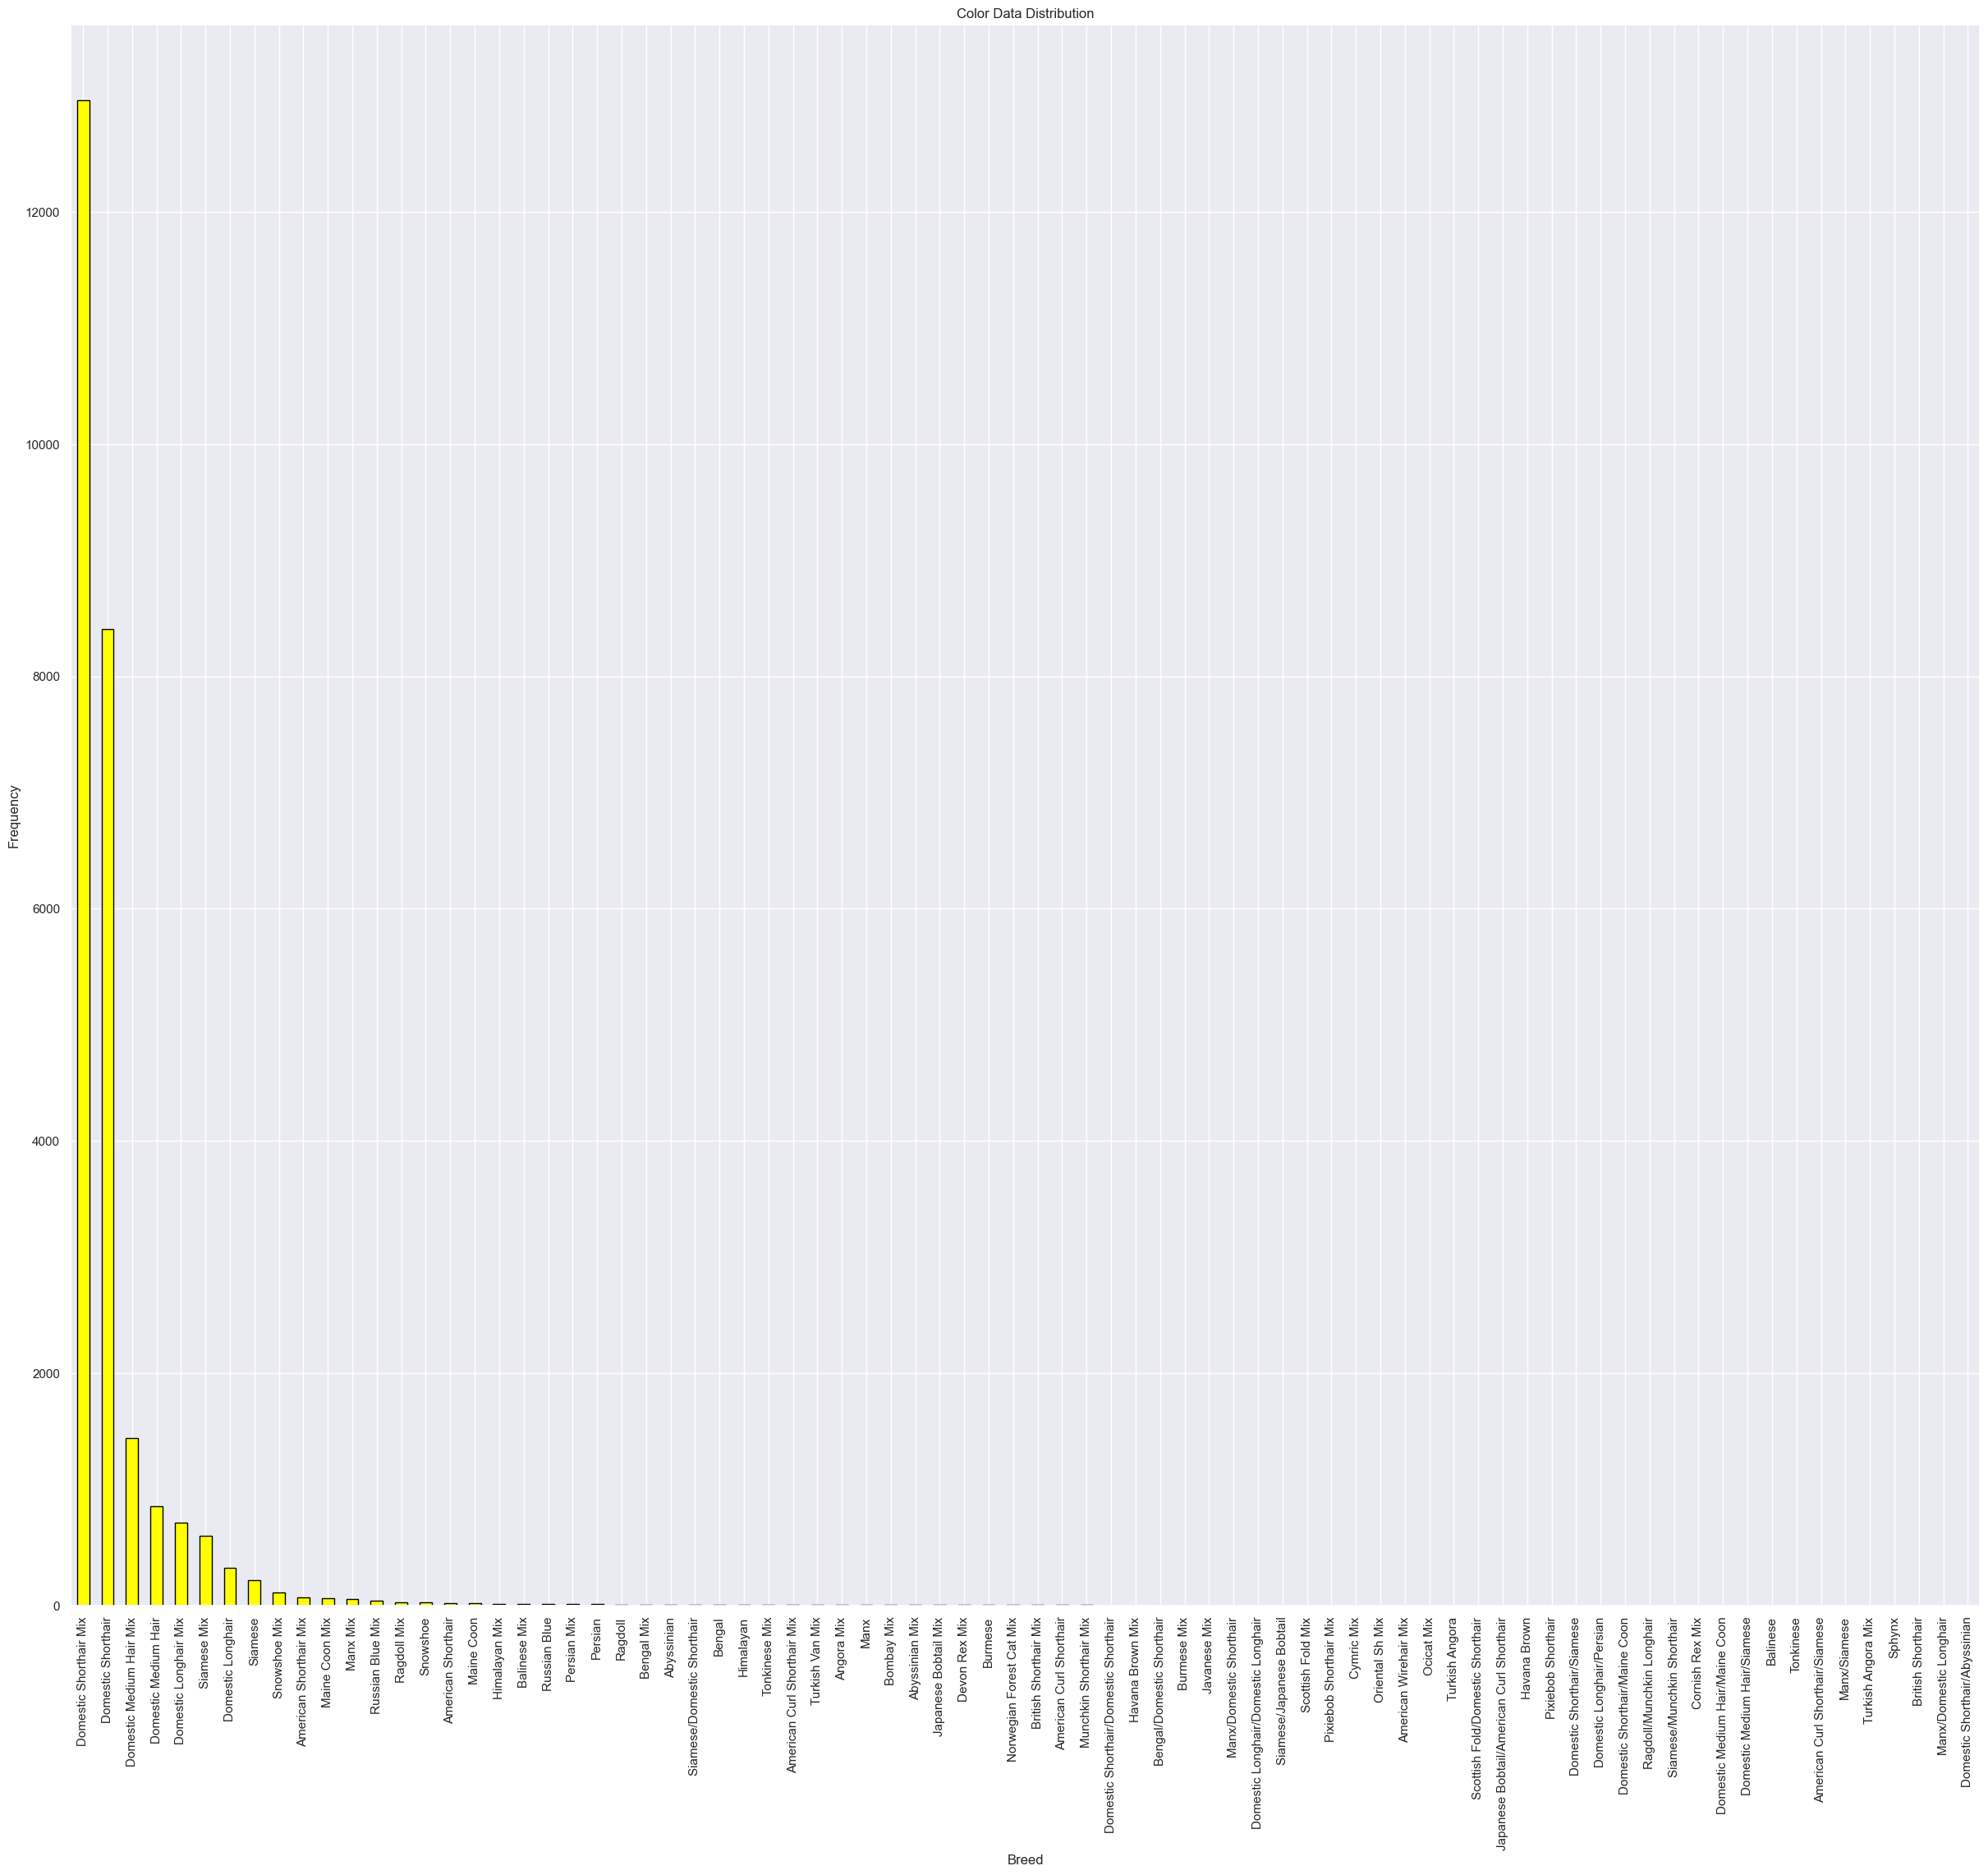

In [50]:
#NOW BREED
breed_counts = df['breed'].value_counts()
breed_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

In [51]:
breed_counts = df['breed'].value_counts()
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Convert the Series to a DataFrame for better display
breed_counts_df = pd.DataFrame({'breed': breed_counts.index, 'Count': breed_counts.values})

# Display the DataFrame
print(breed_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

                                       breed  Count
0                     Domestic Shorthair Mix  12964
1                         Domestic Shorthair   8408
2                   Domestic Medium Hair Mix   1442
3                       Domestic Medium Hair    852
4                      Domestic Longhair Mix    711
5                                Siamese Mix    599
6                          Domestic Longhair    327
7                                    Siamese    216
8                               Snowshoe Mix    110
9                     American Shorthair Mix     71
10                            Maine Coon Mix     62
11                                  Manx Mix     54
12                          Russian Blue Mix     44
13                               Ragdoll Mix     27
14                                  Snowshoe     25
15                        American Shorthair     21
16                                Maine Coon     20
17                             Himalayan Mix     16
18          

## step 1

In [52]:
def assign_breed(input_string):
    if 'Domestic Shorthair Mix/' in input_string:
        return 'Domestic Shorthair Mix'
    elif 'Domestic Shorthair/' in input_string:
        return 'Domestic Shorthair'
    
    elif 'Domestic Medium Hair Mix/' in input_string:
        return 'Domestic Medium Hair Mix'
    elif 'Domestic Medium Hair/' in input_string:
        return 'Domestic Medium Hair'
    
    elif 'Domestic Longhair Mix/' in input_string:
        return 'Domestic Longhair Mix'
    elif 'Domestic Longhair/' in input_string:
        return 'Domestic Longhair'
    
    elif 'Siamese Mix/' in input_string:
        return 'Siamese Mix'
    elif 'Siamese/' in input_string:
        return 'Siamese'
    
    else:
        return input_string

df['breed'] = df['breed'].apply(assign_breed)
# df.loc[:,'breed'] = df['breed']


df.head()


/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/3684012148.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['breed'] = df['breed'].apply(assign_breed)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic Shorthair Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Bengal,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic Medium Hair Mix,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic Shorthair Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic Shorthair Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [53]:
breed_counts = df['breed'].value_counts()
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# # Get the counts of unique values in the 'color' column
# CoatPattern_counts = df['CoatPattern'].value_counts()

# Convert the Series to a DataFrame for better display
breed_counts_df = pd.DataFrame({'breed': breed_counts.index, 'Count': breed_counts.values})

# Display the DataFrame
print(breed_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

                                       breed  Count
0                     Domestic Shorthair Mix  12964
1                         Domestic Shorthair   8413
2                   Domestic Medium Hair Mix   1442
3                       Domestic Medium Hair    854
4                      Domestic Longhair Mix    711
5                                Siamese Mix    599
6                          Domestic Longhair    330
7                                    Siamese    226
8                               Snowshoe Mix    110
9                     American Shorthair Mix     71
10                            Maine Coon Mix     62
11                                  Manx Mix     54
12                          Russian Blue Mix     44
13                               Ragdoll Mix     27
14                                  Snowshoe     25
15                        American Shorthair     21
16                                Maine Coon     20
17                             Himalayan Mix     16
18          

## Step 2

In [54]:


def assign_breed(input_string):
    if 'Domestic Shorthair Mix' in input_string and '/' not in input_string:
        return 'Domestic_Shorthair_Mix'
    
    elif 'Domestic Shorthair' in input_string and '/' not in input_string:
        return 'Domestic_Shorthair'
    
    elif 'Domestic Medium Hair' in input_string and '/' not in input_string:
        return 'Domestic_Medium_Hair'
    
    elif 'Domestic Longhair' in input_string and '/' not in input_string:
        return 'Domestic_Longhair'
    
    elif 'Siamese' in input_string and '/' not in input_string:
        return 'Siamese'
    
    else:
        return 'Other'

df['breed'] = df['breed'].apply(assign_breed)
# df.loc[:,'breed'] = df['breed']


df.head()


/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/721745264.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['breed'] = df['breed'].apply(assign_breed)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Domestic_Medium_Hair,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [55]:
def assign_breed(input_string):
    if 'Domestic_Medium_Hair' in input_string or 'Domestic_Longhair' in input_string or 'Siamese' in input_string:
        return 'Other'
    else:
        return input_string

df['breed'] = df['breed'].apply(assign_breed)
# df.loc[:,'breed'] = df['breed']

df.head()

/var/folders/gg/llps9cpn1lsdx8__qqd2w6v80000gn/T/ipykernel_9274/4206315864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['breed'] = df['breed'].apply(assign_breed)


,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [56]:
breed_counts = df['breed'].value_counts()
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# # Get the counts of unique values in the 'color' column
# CoatPattern_counts = df['CoatPattern'].value_counts()

# Convert the Series to a DataFrame for better display
breed_counts_df = pd.DataFrame({'breed': breed_counts.index, 'Count': breed_counts.values})

# Display the DataFrame
print(breed_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')

                    breed  Count
0  Domestic_Shorthair_Mix  12964
1      Domestic_Shorthair   8413
2                   Other   4783


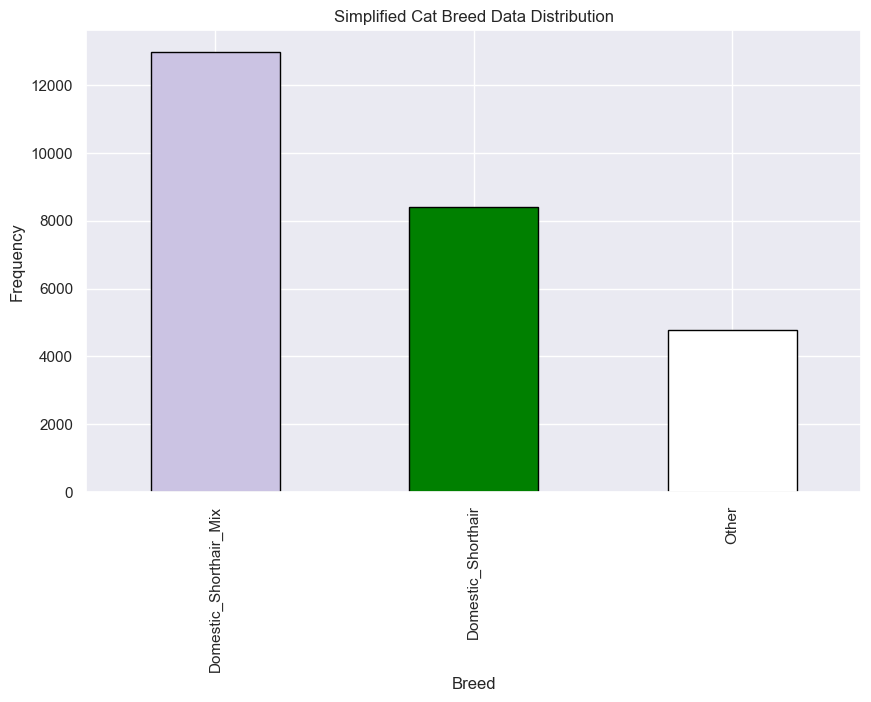

In [57]:

# Create a color dictionary for each category

color_dict = {'Domestic_Shorthair_Mix':'#CBC3E3', 'Domestic_Shorthair': 'green', 'Other': 'white'}

# Plot the bar chart with specified colors
breed_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in breed_counts.index])

# Adding labels and title
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.title('Simplified Cat Breed Data Distribution')

# Display the plot
plt.show()


### now that we are done with the two with the most unique values, we vizualize the rest, we obviously will drop unknown for sex

# Sex Data Cleaning and Visualization

In [58]:
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Neutered Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Intact Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Intact Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Intact Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


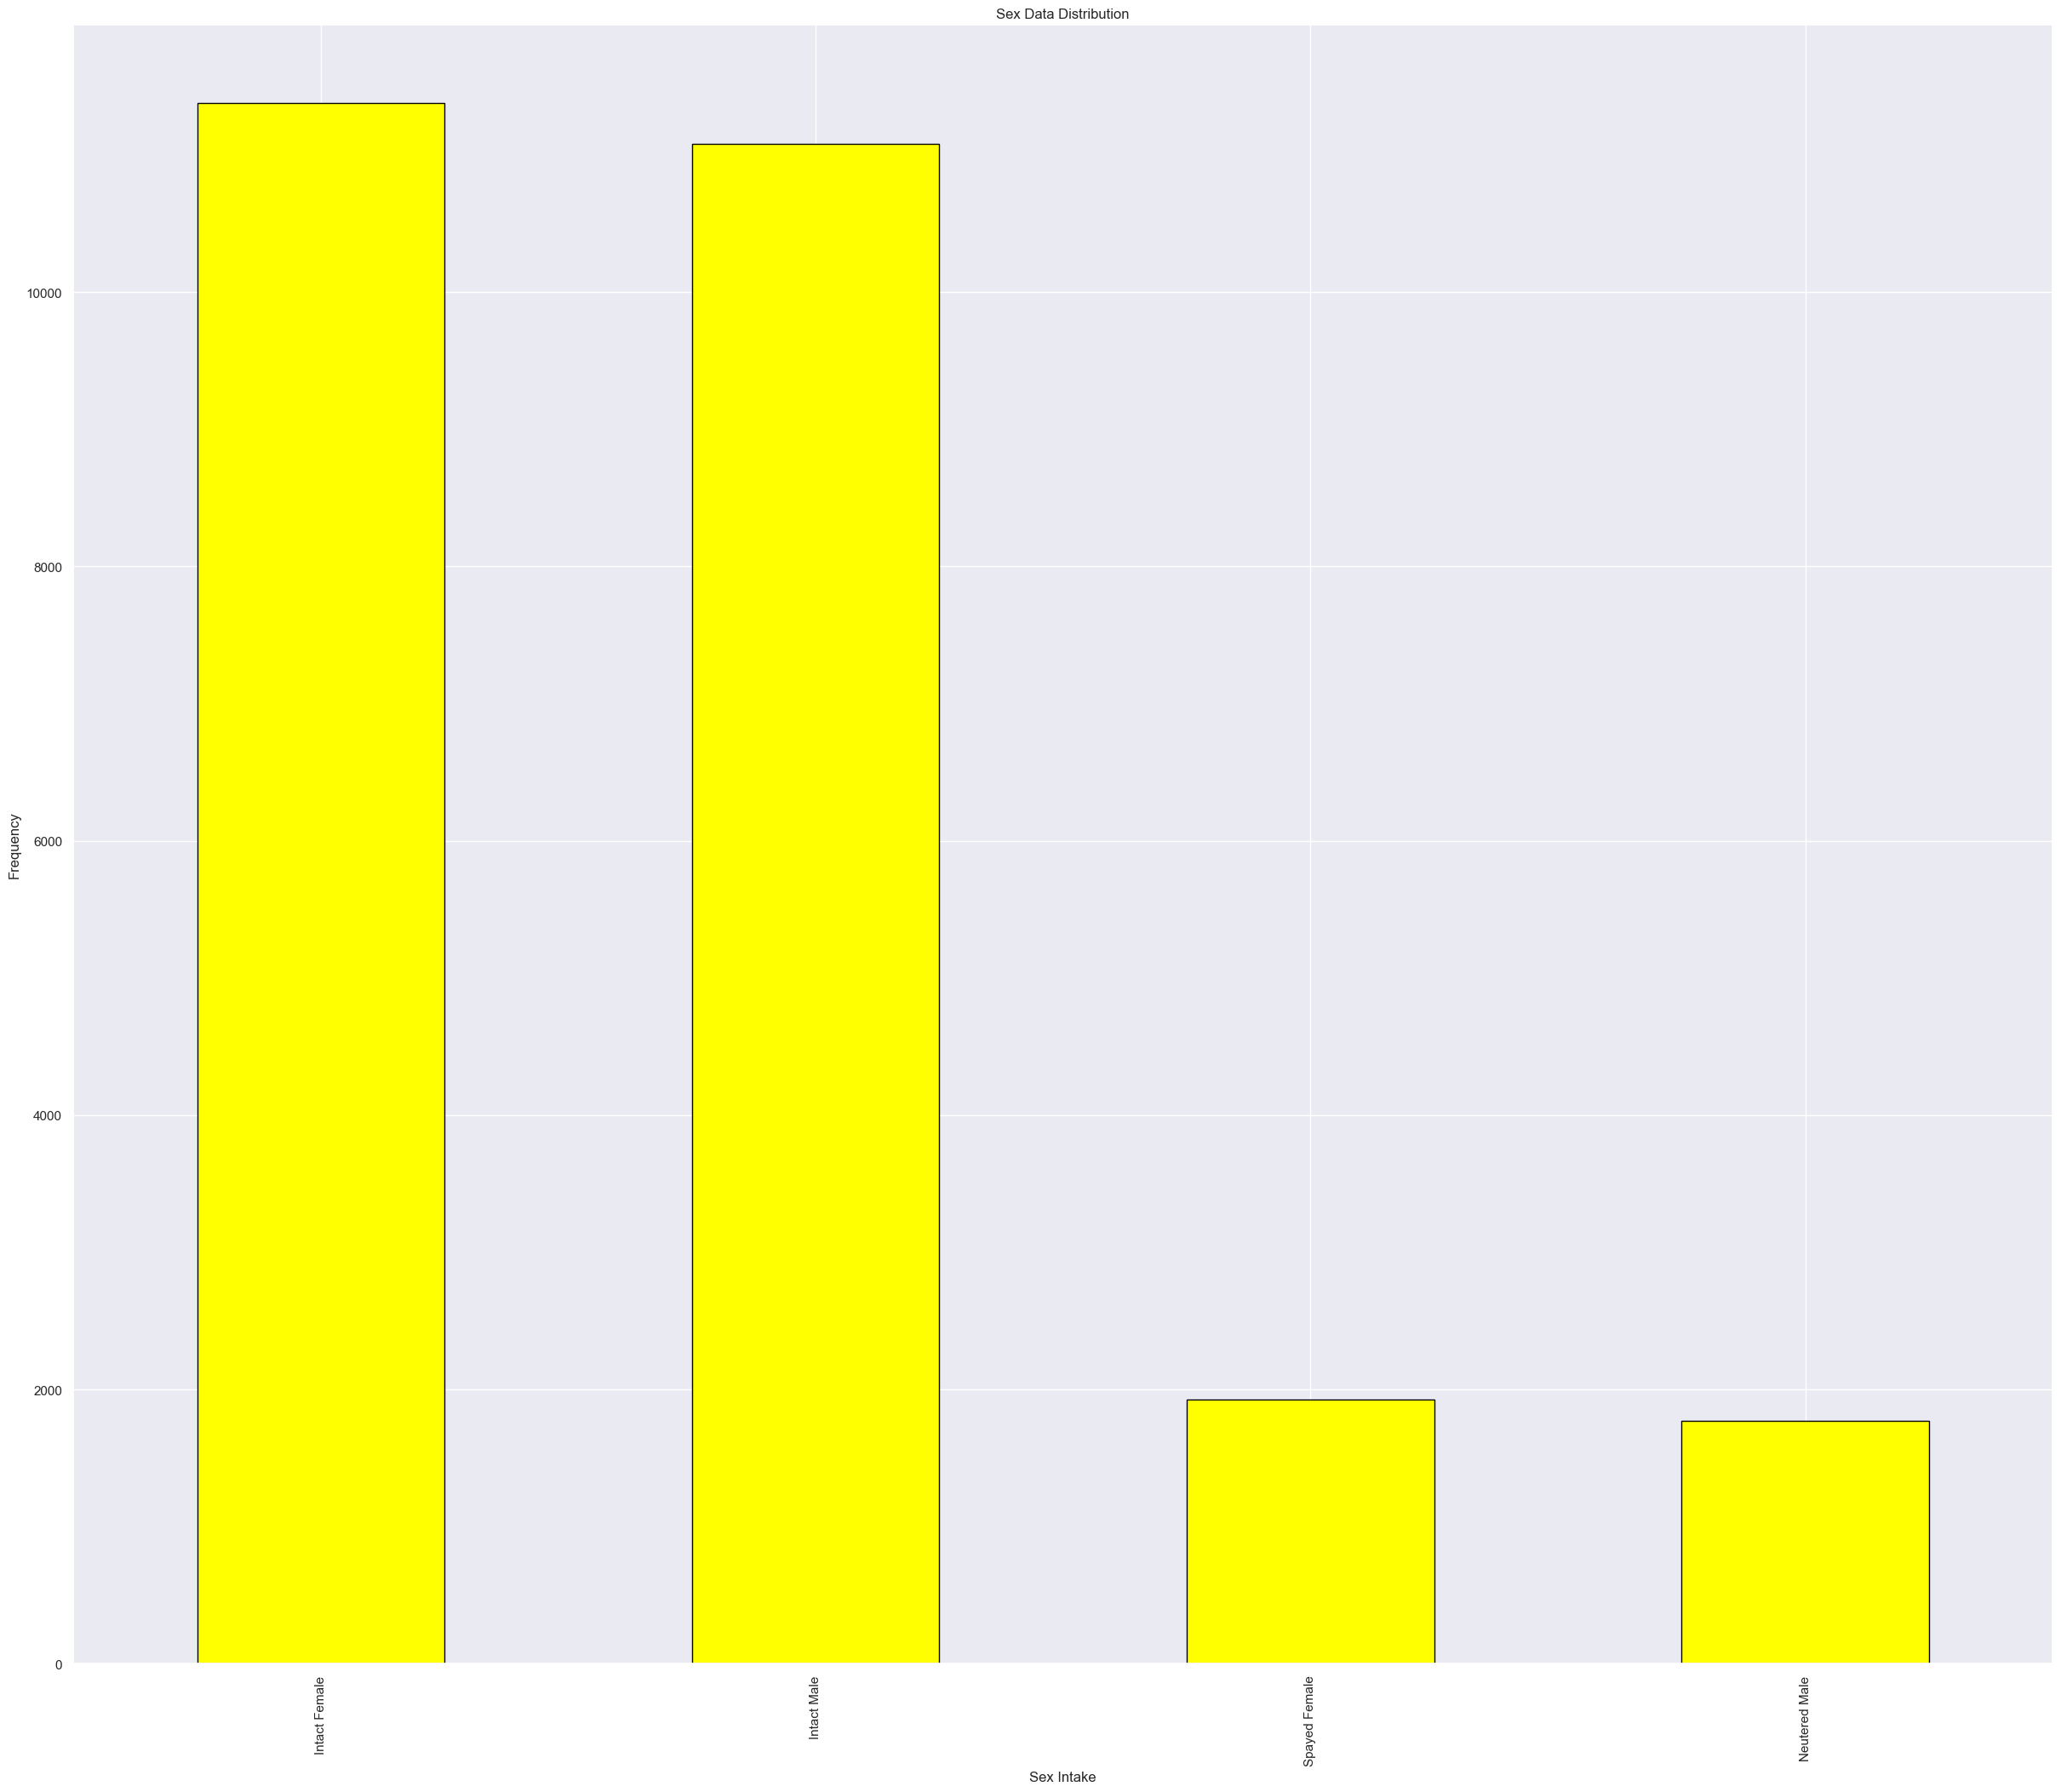

In [59]:
df = df[df['sex_intake'] != 'Unknown']
sex_counts = df['sex_intake'].value_counts()
sex_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Sex Intake')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

In [60]:
sex_counts = df['sex_intake'].value_counts()
sex_counts

Intact Female    11379
Intact Male      11083
Spayed Female     1924
Neutered Male     1773
Name: sex_intake, dtype: int64

In [61]:
def assign_sex(input_string):
    if 'Female'in input_string:
        return 'Female'
    elif 'Male'in input_string:
        return 'Male'

df['sex_intake'] = df['sex_intake'].apply(assign_sex)

df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [62]:
sex_counts = df['sex_intake'].value_counts()
sex_counts

Female    13303
Male      12856
Name: sex_intake, dtype: int64

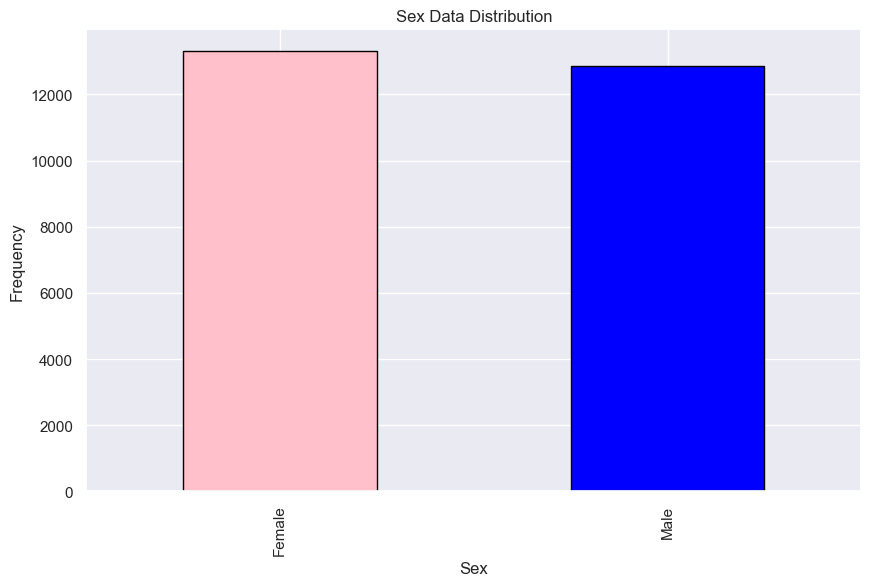

In [63]:
# ploting bar plot for simplified sex column

color_dict = {'Male': 'blue', 'Female': 'pink'}

# Plot the bar chart with specified colors
sex_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in sex_counts.index])

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

# data cleaning & visualization for 'intake_type'

In [64]:
df.shape

(26159, 16)

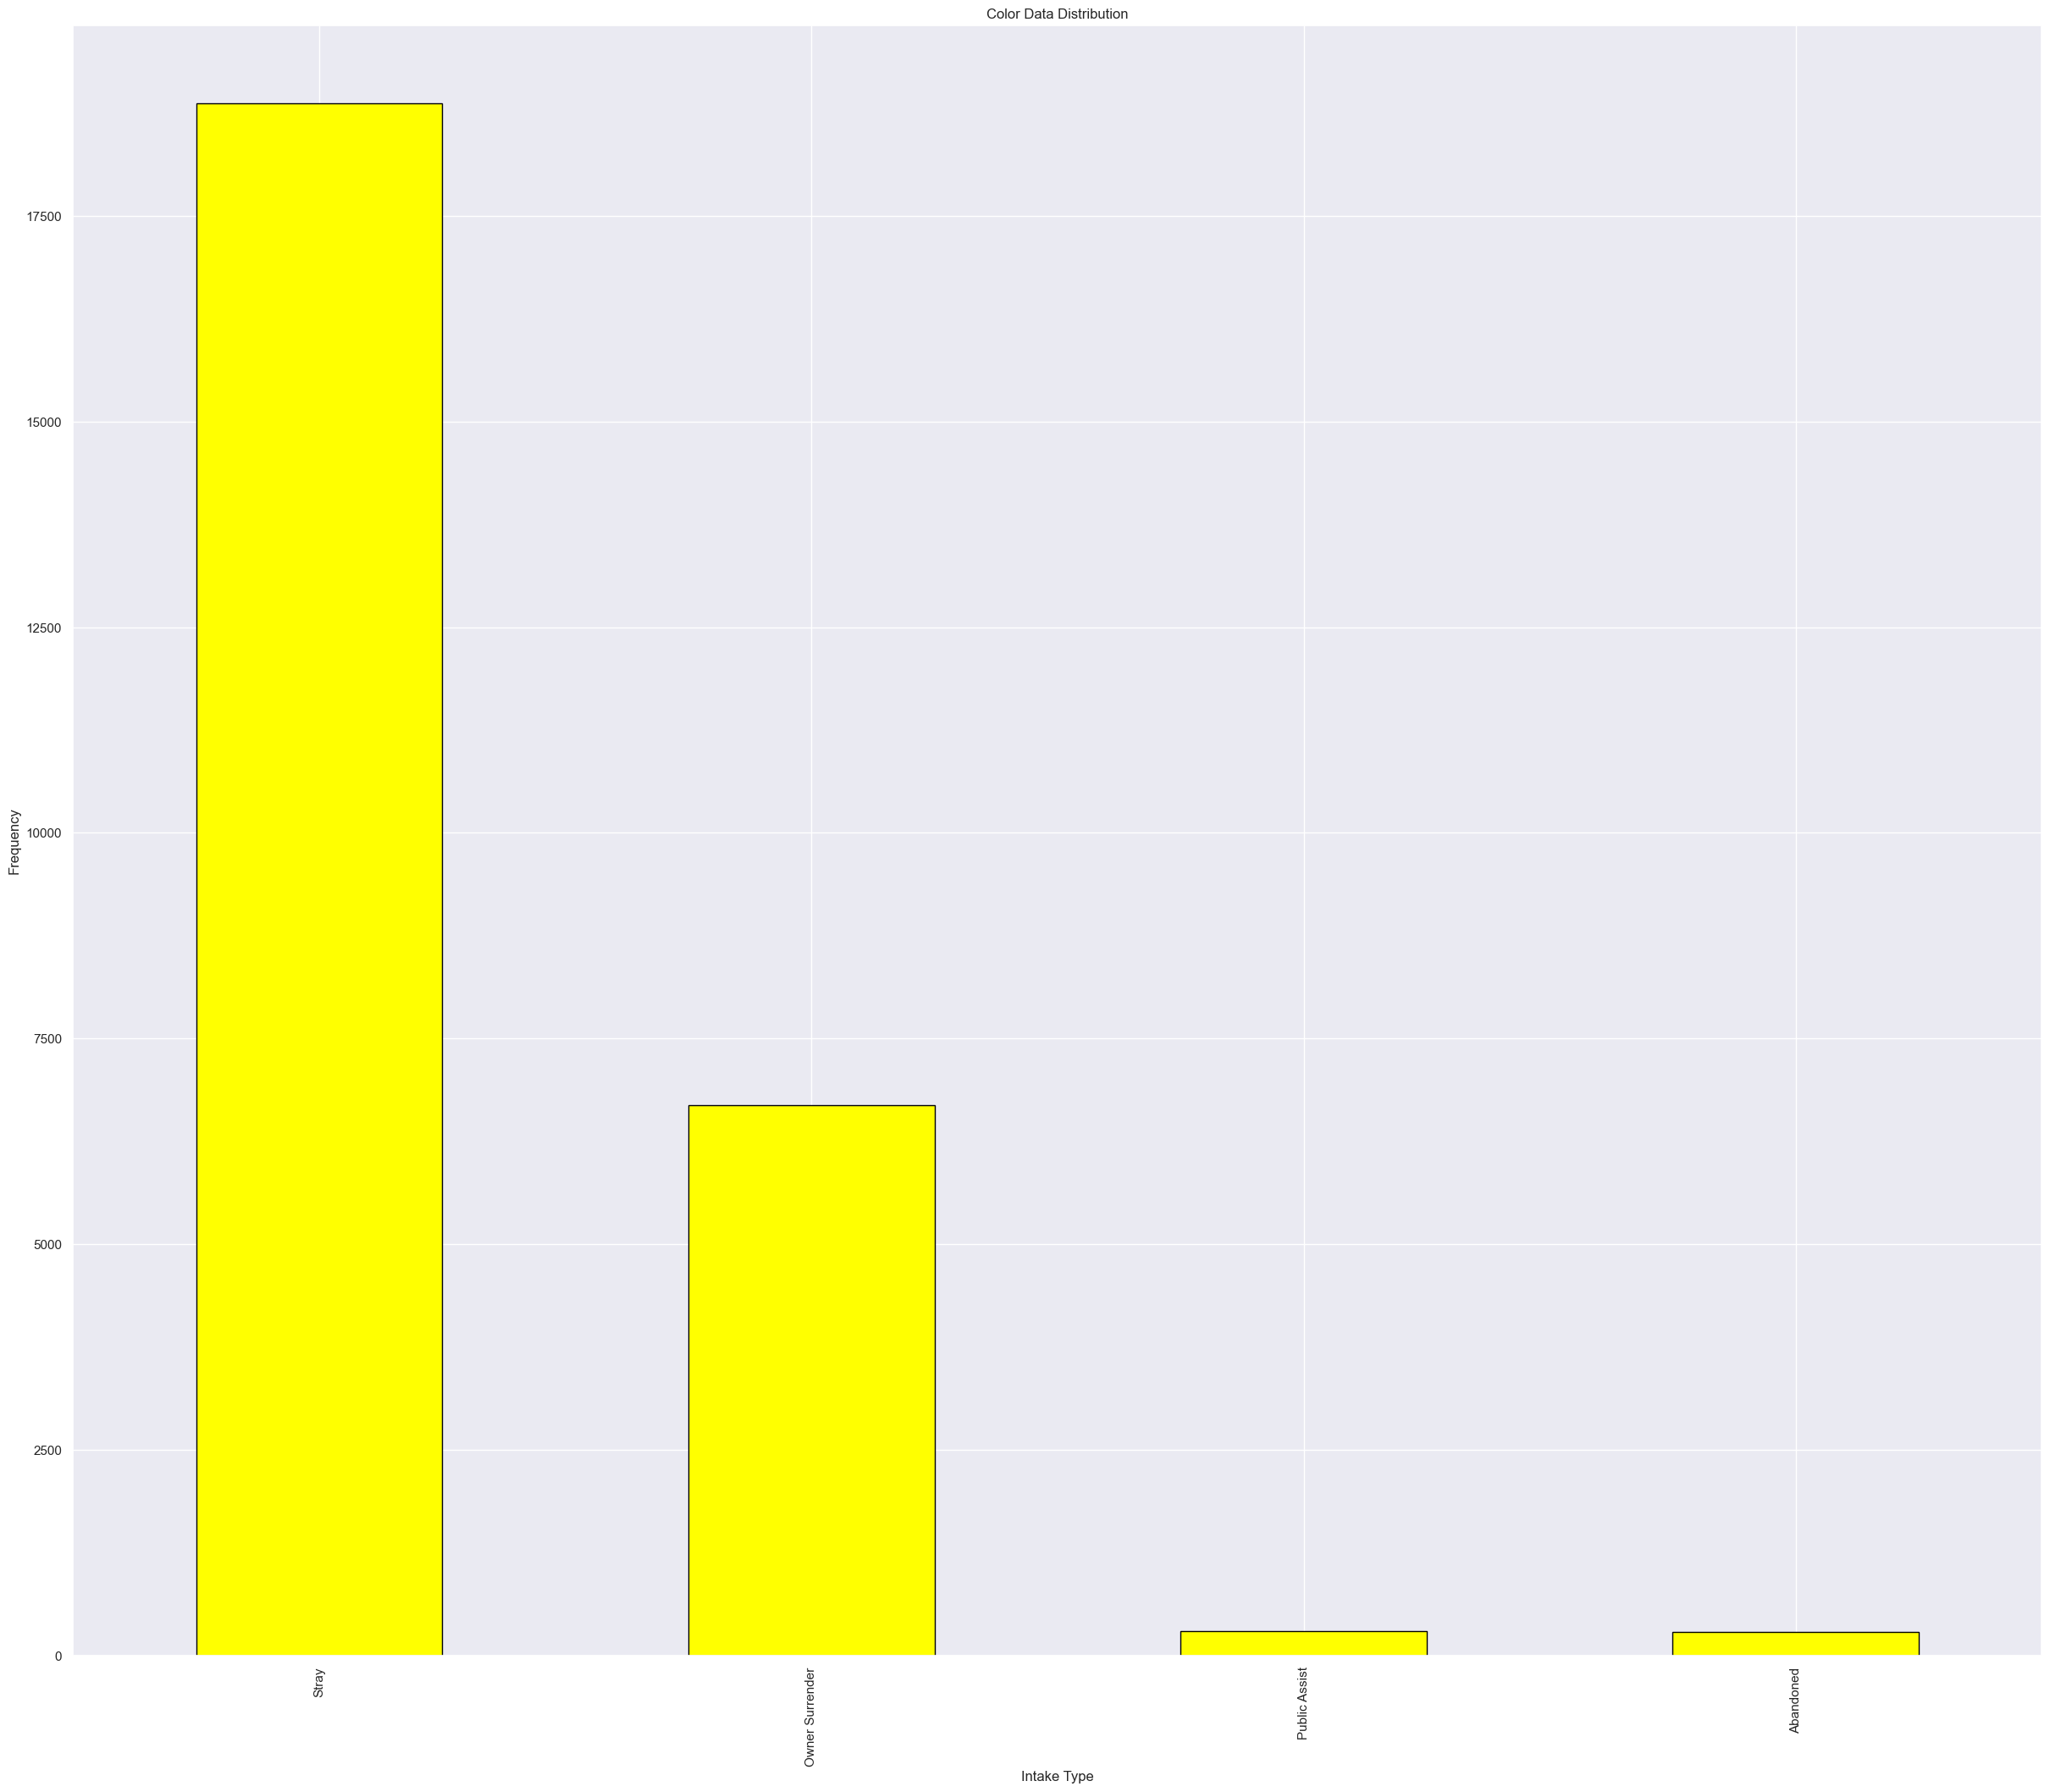

In [65]:
#cats might get spayed or not before being adopted
df = df[df['intake_type'] != 'Euthanasia Request']
intake_type_counts = df['intake_type'].value_counts()
intake_type_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

In [66]:
intake_type_counts = df['intake_type'].value_counts()
intake_type_counts

Stray              18872
Owner Surrender     6690
Public Assist        302
Abandoned            291
Name: intake_type, dtype: int64

In [67]:
def assign_intake_type(input_string):
    if 'Public Assist'in input_string or 'Abandoned'in input_string:
        return 'Other'
    elif 'Owner Surrender' in input_string:
        return 'Owner_Surrender'
    else:
        return input_string

df['intake_type'] = df['intake_type'].apply(assign_intake_type)

df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby
3,A665398,2013-10-17 12:26:00,Owner_Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid


In [68]:
intake_type_counts = df['intake_type'].value_counts()
intake_type_counts

Stray              18872
Owner_Surrender     6690
Other                593
Name: intake_type, dtype: int64

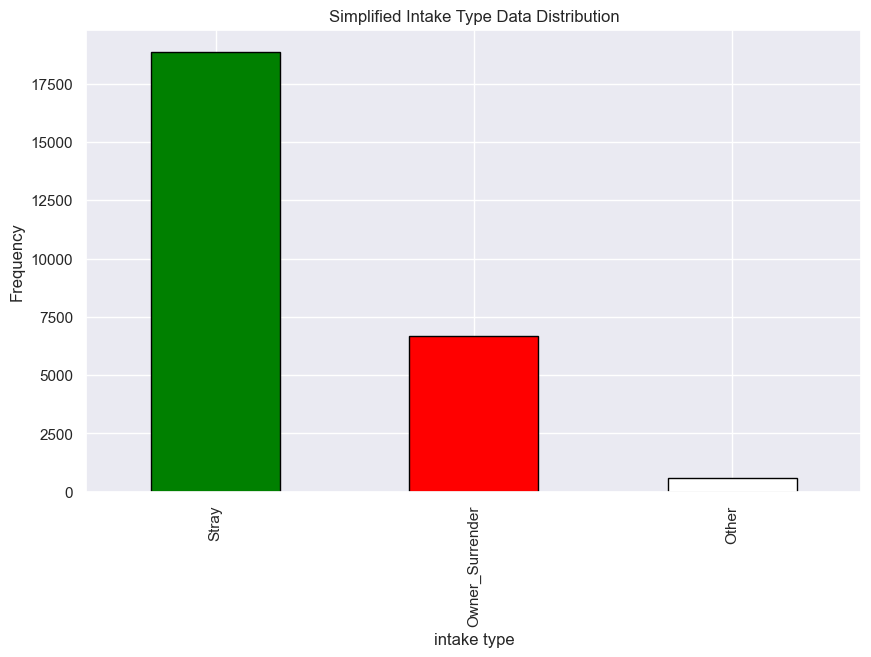

In [69]:

# Create a color dictionary for each category
color_dict = {'Stray': 'green', 'Other': 'white', 'Owner_Surrender': 'red'}

# Plot the bar chart with specified colors
intake_type_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in intake_type_counts.index])

# Adding labels and title
plt.xlabel('intake type')
plt.ylabel('Frequency')
plt.title('Simplified Intake Type Data Distribution')

# Display the plot
plt.show()


# data cleaning & visualization for 'age_intake'

In [70]:
age_intake_counts = df['age_intake'].value_counts()
age_intake_counts

1 month      7310
2 months     3472
4 weeks      2413
1 year       1804
2 years      1624
3 months     1364
3 weeks      1303
4 months      991
5 months      634
3 years       572
6 months      483
2 weeks       459
4 years       326
5 years       294
7 months      235
8 years       231
6 years       211
8 months      208
5 weeks       205
1 weeks       197
7 years       196
9 months      192
0 years       184
10 years      159
9 years       130
1 day         129
1 week        121
10 months     106
3 days         77
2 days         74
11 years       70
12 years       66
11 months      62
13 years       57
6 days         48
14 years       40
4 days         36
15 years       30
5 days         22
16 years       10
18 years        5
17 years        4
19 years        1
Name: age_intake, dtype: int64

### Converting age to months 

In [71]:
df['age_intake'].isna().sum()

0

In [72]:

# Conversion function
# Conversion function
def convert_to_months(value):
    if 'week' in value:
        return int(np.round(float(value.split()[0]) / 4))  # 1 week is 1/4 of a month
    elif 'month' in value:
        return int(np.round(float(value.split()[0])))
    elif 'year' in value:
        return int(np.round(float(value.split()[0]) * 12))
    elif 'day' in value:
        return int(np.round(float(value.split()[0]) / 30))  # 1 month is approximately 30 days
    else:
        return pd.to_numeric(value, errors='coerce')  # Convert numeric values, handle non-numeric as NaN

# Apply the conversion function to 'age_intake' column
df['age_intake_months'] = df['age_intake'].apply(convert_to_months)
df.head()
# # Keep only numeric values
# df = df.dropna(subset=['age_intake'])

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern,age_intake_months
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid,1
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other,36
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby,1
3,A665398,2013-10-17 12:26:00,Owner_Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid,1
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid,1


In [73]:
df = df.dropna(subset=['age_intake_months'])
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern,age_intake_months
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid,1
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other,36
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby,1
3,A665398,2013-10-17 12:26:00,Owner_Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid,1
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid,1


In [74]:
age_intake_months_counts = df['age_intake_months'].value_counts()
age_intake_months_counts

1      11231
2       3472
12      1804
24      1624
3       1364
0       1347
4        991
5        634
36       572
6        483
48       326
60       294
7        235
96       231
72       211
8        208
84       196
9        192
120      159
108      130
10       106
132       70
144       66
11        62
156       57
168       40
180       30
192       10
216        5
204        4
228        1
Name: age_intake_months, dtype: int64

### sorting in the ascending order of months 

In [75]:
age_intake_months_counts = age_intake_months_counts.sort_index()

# Display the sorted DataFrame
print(age_intake_months_counts)


0       1347
1      11231
2       3472
3       1364
4        991
5        634
6        483
7        235
8        208
9        192
10       106
11        62
12      1804
24      1624
36       572
48       326
60       294
72       211
84       196
96       231
108      130
120      159
132       70
144       66
156       57
168       40
180       30
192       10
204        4
216        5
228        1
Name: age_intake_months, dtype: int64


### removing age > 200 months (18 years)

In [76]:
df= df[df['age_intake_months']<200]
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern,age_intake_months
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid,1
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other,36
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby,1
3,A665398,2013-10-17 12:26:00,Owner_Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid,1
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid,1


### Again sorting in the ascending order of months 

In [77]:
age_intake_months_counts = df['age_intake_months'].value_counts()
age_intake_months_counts = age_intake_months_counts.sort_index()

# Display the sorted DataFrame
print(age_intake_months_counts)

0       1347
1      11231
2       3472
3       1364
4        991
5        634
6        483
7        235
8        208
9        192
10       106
11        62
12      1804
24      1624
36       572
48       326
60       294
72       211
84       196
96       231
108      130
120      159
132       70
144       66
156       57
168       40
180       30
192       10
Name: age_intake_months, dtype: int64


### Decending order order of values

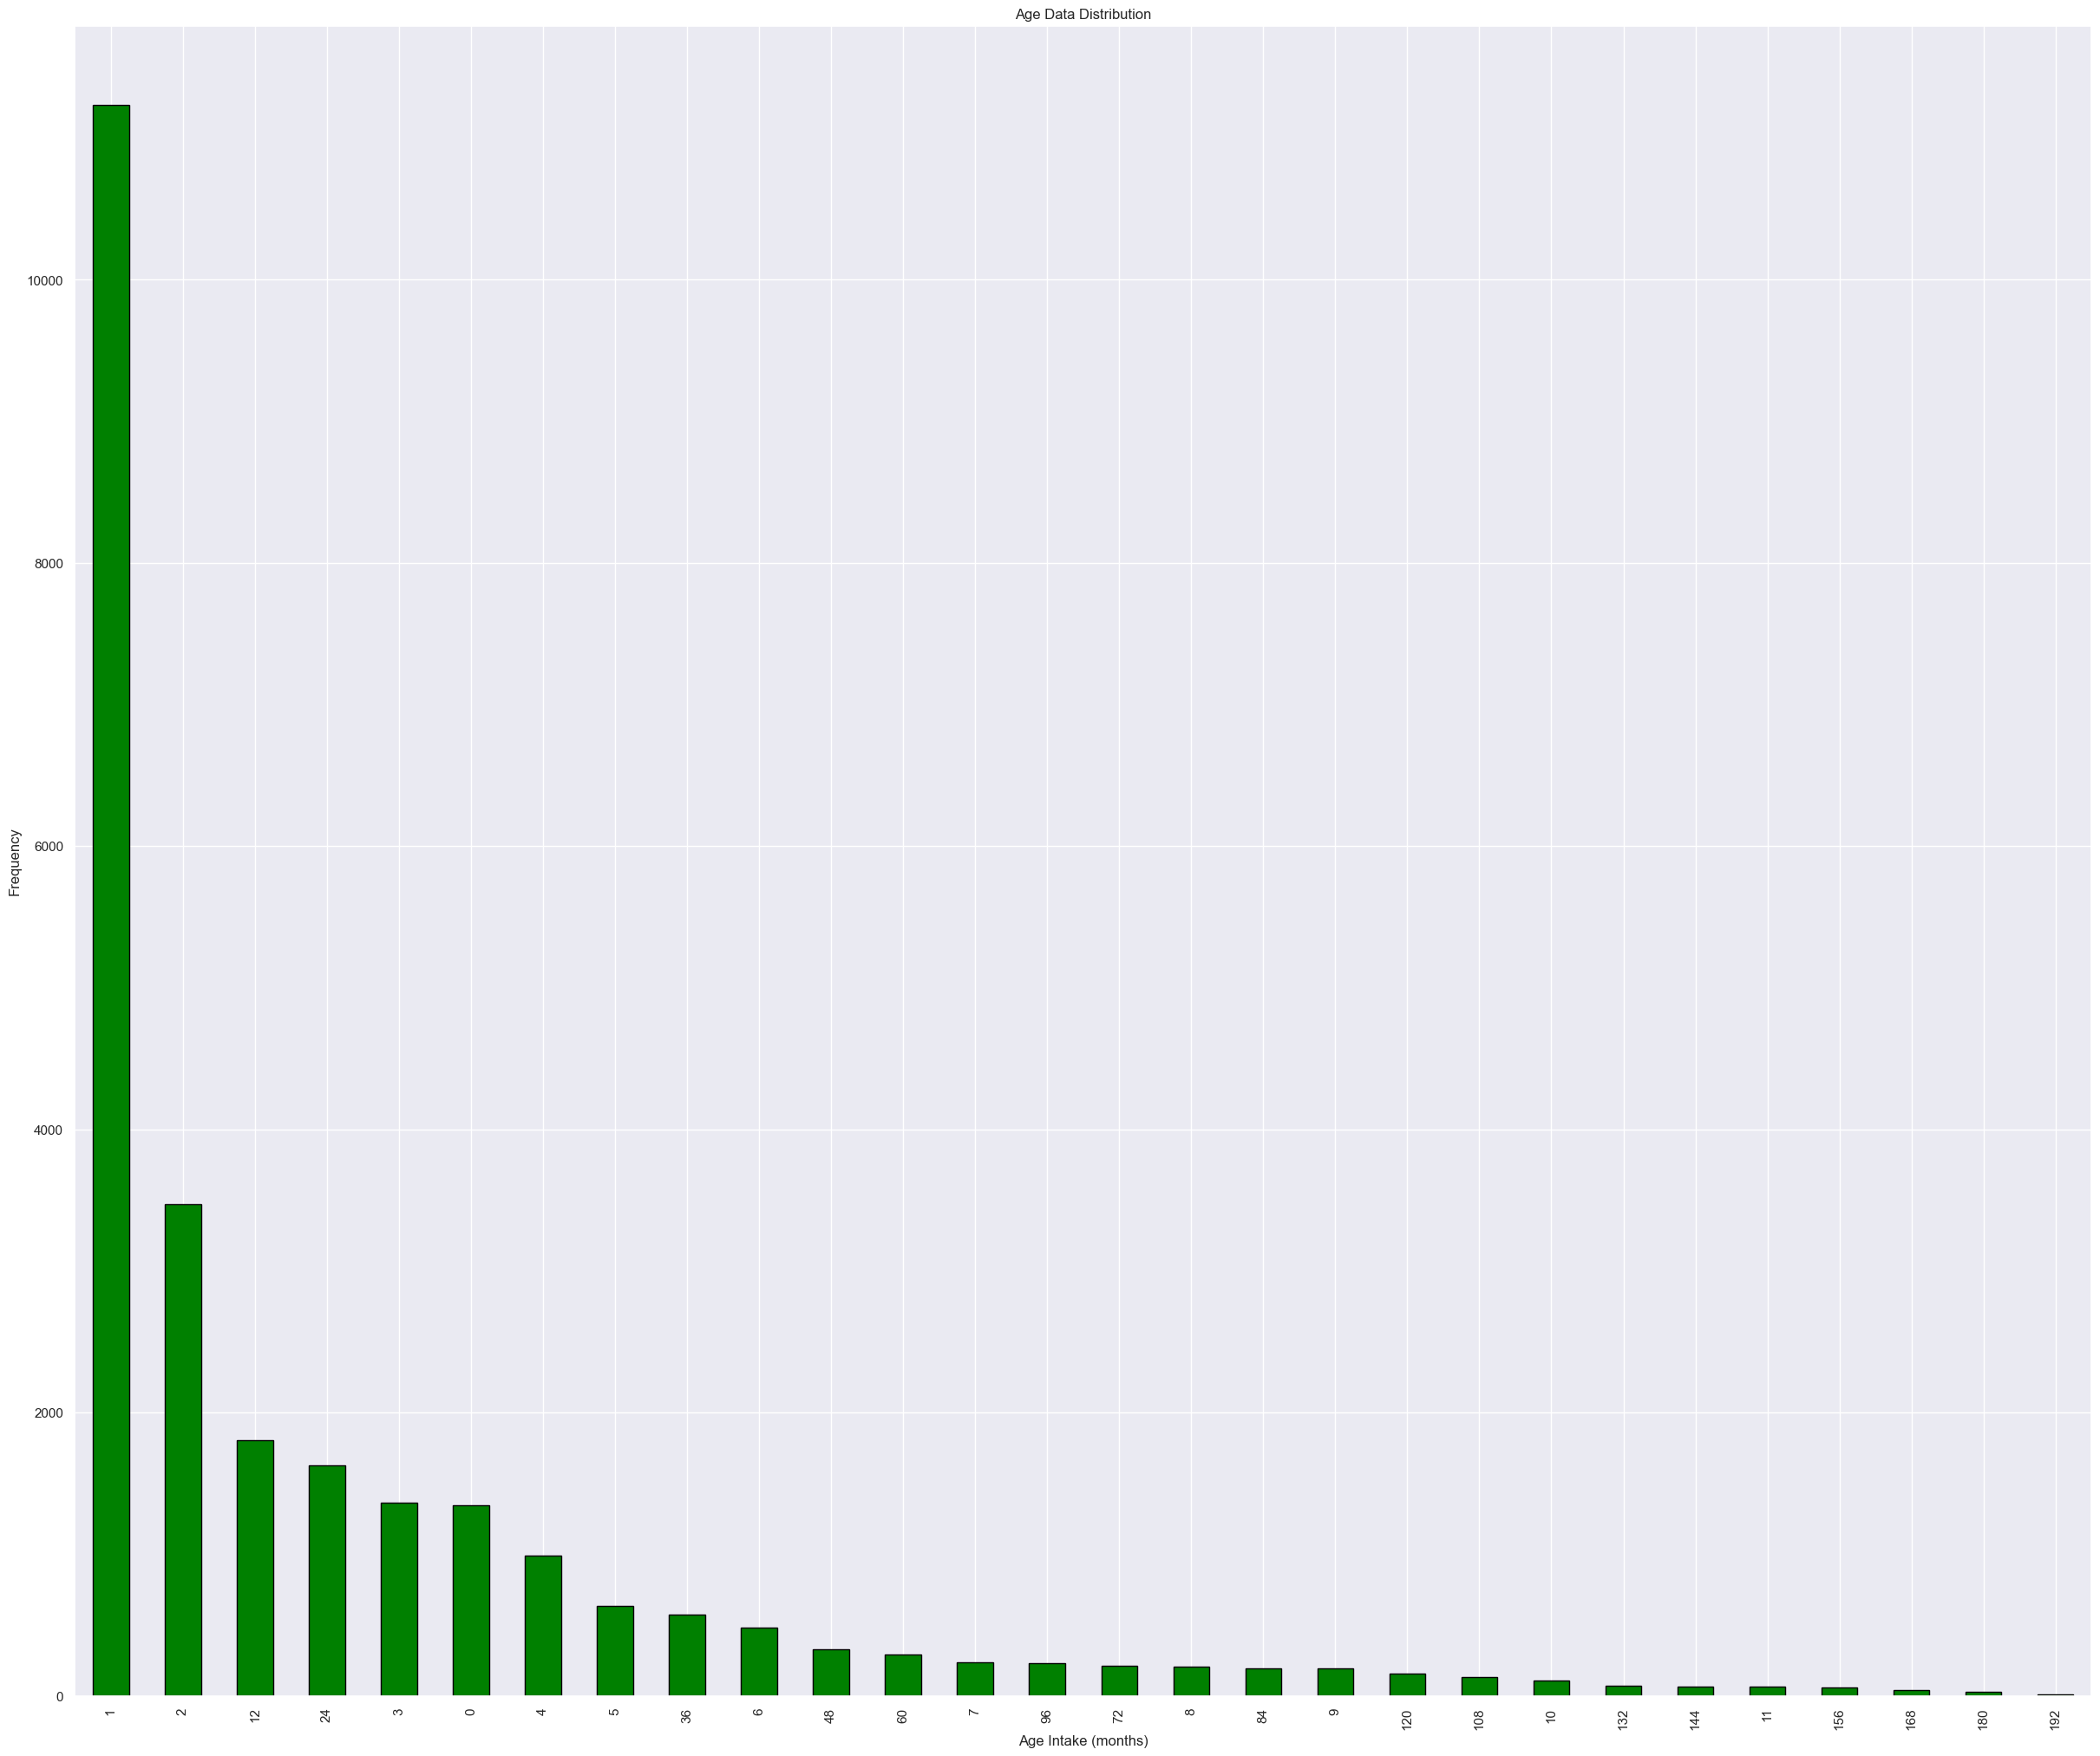

In [78]:
age_intake_months_counts = df['age_intake_months'].value_counts()

age_intake_months_counts.plot(kind='bar', color='green', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Age Intake (months)')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# Display the plot
plt.show()

### Ascending order of months

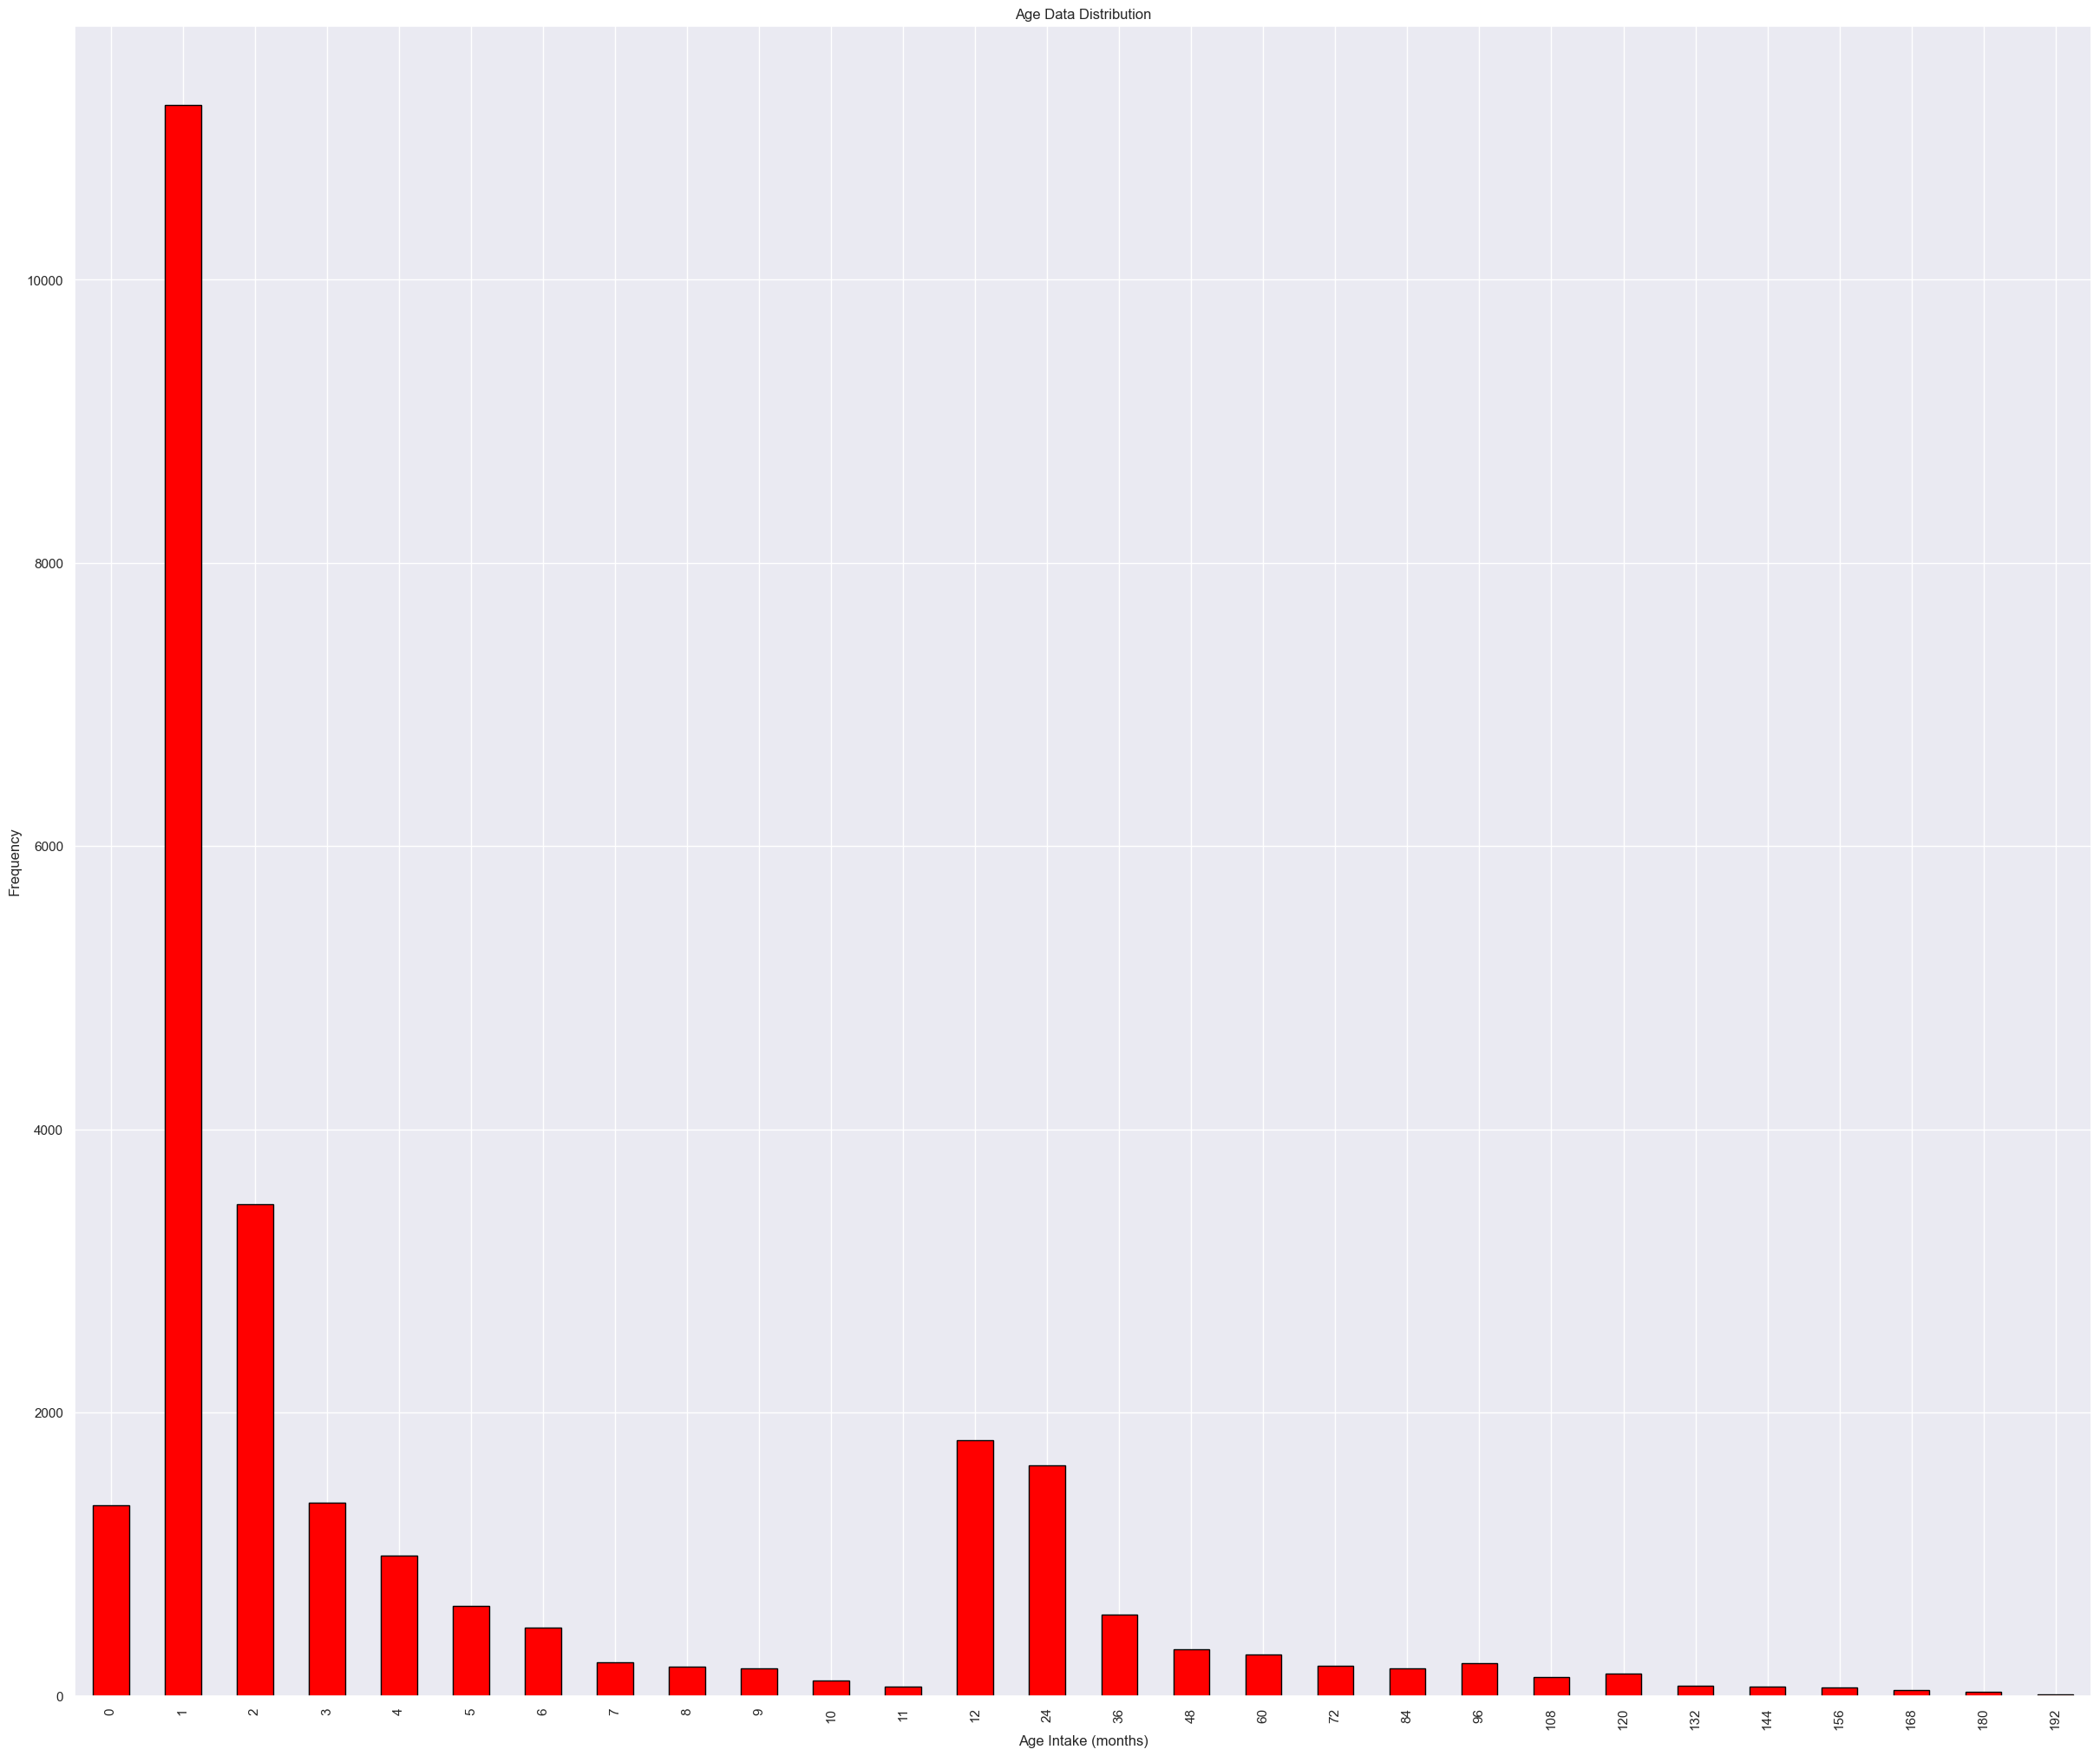

In [79]:
age_intake_months_counts = df['age_intake_months'].value_counts()
age_intake_months_counts = age_intake_months_counts.sort_index()
age_intake_months_counts.plot(kind='bar', color='red', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Age Intake (months)')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# Display the plot
plt.show()

In [80]:
df.head()

,Animal ID,date_intake,intake_type,intake_condition,sex_intake,age_intake,breed,color,date_outcome,dob,outcome_type,sex_outcome,age_outcome,stay_length,CoatColor,CoatPattern,age_intake_months
0,A664887,2013-10-10 13:48:00,Stray,Normal,Female,1 month,Domestic_Shorthair_Mix,Black,2013-11-10 16:56:00,08/10/2013,Adoption,Spayed Female,3 months,31,Black,Solid,1
1,A665496,2013-10-18 18:07:00,Stray,Normal,Male,3 years,Other,Brown Tiger,2013-10-22 17:54:00,04/18/2010,Adoption,Neutered Male,3 years,3,Brown,Other,36
2,A664936,2013-10-11 11:20:00,Stray,Normal,Male,1 month,Other,Brown Tabby,2013-12-18 18:18:00,08/18/2013,Adoption,Neutered Male,4 months,68,Brown,Tabby,1
3,A665398,2013-10-17 12:26:00,Owner_Surrender,Normal,Female,1 month,Domestic_Shorthair_Mix,White/Blue,2013-11-10 16:45:00,08/19/2013,Adoption,Spayed Female,2 months,24,White_Mix,Solid,1
4,A665426,2013-10-17 16:53:00,Stray,Normal,Male,1 month,Domestic_Shorthair_Mix,Black,2013-11-16 17:09:00,08/26/2013,Adoption,Neutered Male,2 months,30,Black,Solid,1


# Data Cleaning & Visualization for 'intake_condition'

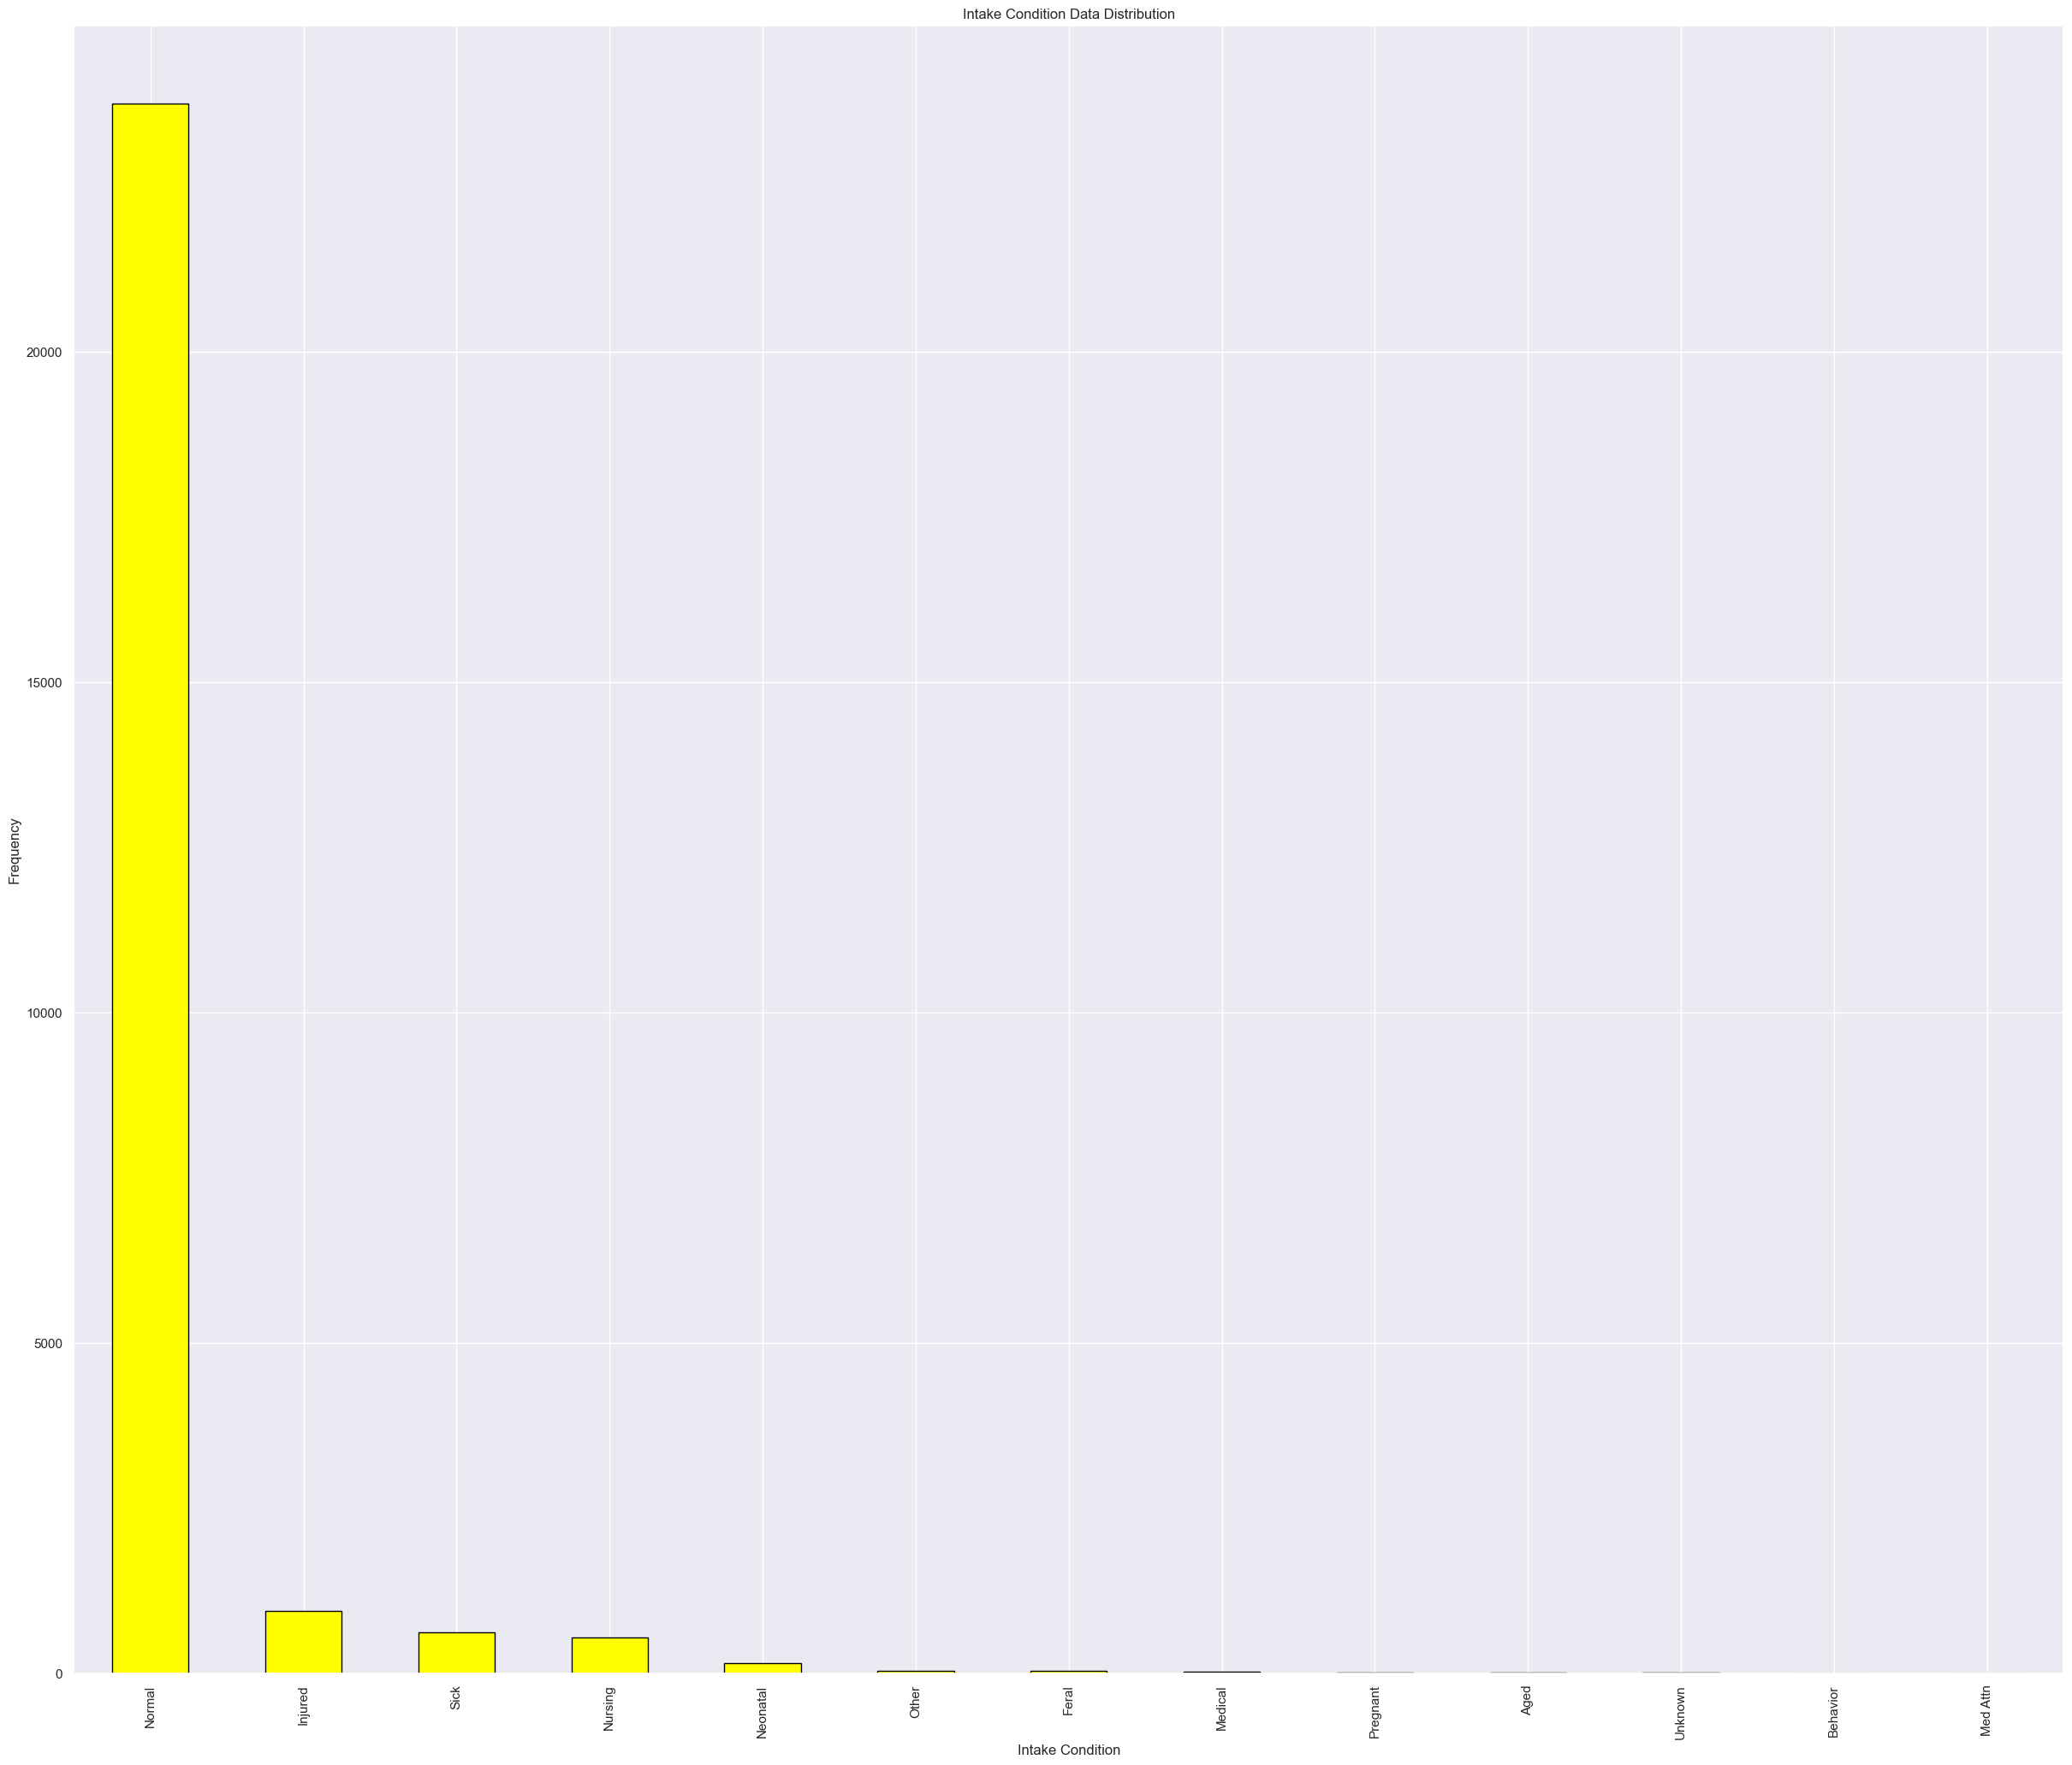

In [81]:

intake_condition_counts = df['intake_condition'].value_counts()
intake_condition_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize=(30, 25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

In [82]:
intake_condition_counts = df['intake_condition'].value_counts()
intake_condition_counts

Normal      23758
Injured       946
Sick          620
Nursing       538
Neonatal      157
Other          37
Feral          32
Medical        27
Pregnant       13
Aged           10
Unknown         5
Behavior        1
Med Attn        1
Name: intake_condition, dtype: int64

In [83]:
select_value = ['Normal', 'Injured', 'Sick', 'Nursing', 'Neonatal', 'Pregnant', 'Other', 'Aged']

# Filtering the DataFrame
df = df[df['intake_condition'].isin(select_value)]

In [84]:
# def assign_intake_type(input_string):
#     if 'Public Assist'in input_string or 'Abandoned'in input_string:
#         return 'Other'
#     elif 'Owner Surrender' in input_string:
#         return 'Owner_Surrender'
#     else:
#         return input_string

# df['intake_type'] = df['intake_type'].apply(assign_intake_type)

# df.head()

In [85]:
intake_condition_counts = df['intake_condition'].value_counts()
intake_condition_counts

Normal      23758
Injured       946
Sick          620
Nursing       538
Neonatal      157
Other          37
Pregnant       13
Aged           10
Name: intake_condition, dtype: int64

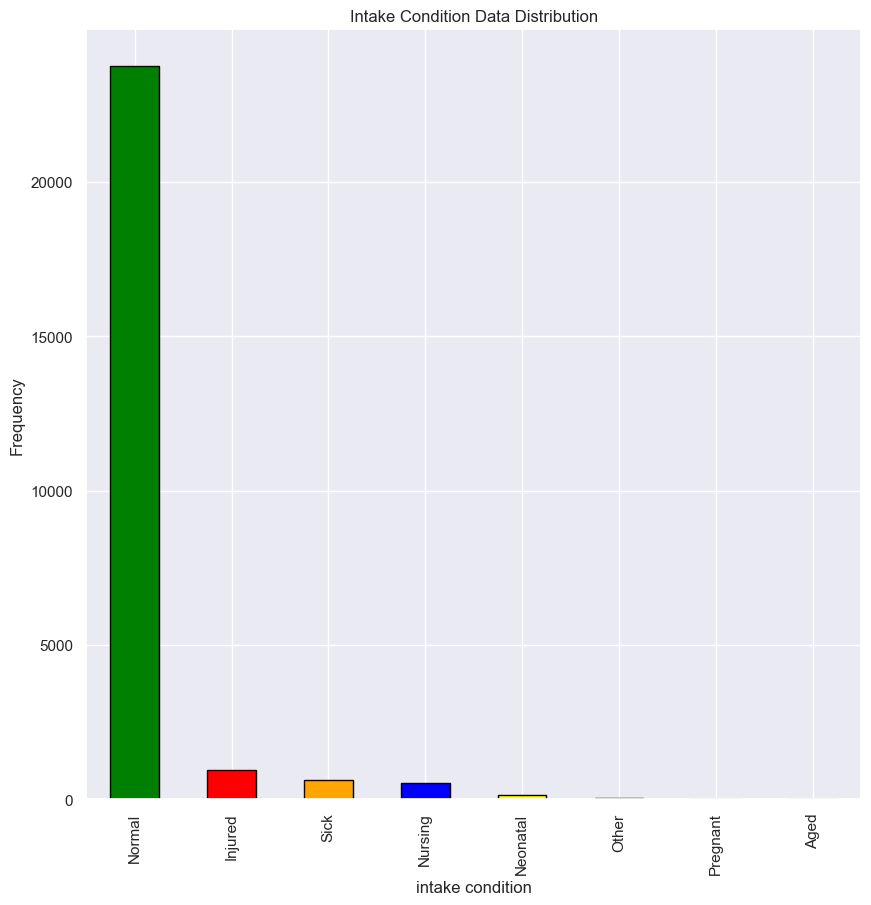

In [86]:

# Create a color dictionary for each category
color_dict = {'Normal': 'green', 'Injured': 'red', 'Sick': 'orange', 'Nursing': 'blue', 'Neonatal': 'yellow', 'Pregnant': 'pink', 'Aged':'black', 'Other': 'white', }

# Plot the bar chart with specified colors
intake_condition_counts.plot(kind='bar', edgecolor='black', figsize=(10, 10), color=[color_dict.get(x, 'blue') for x in intake_condition_counts.index])

# Adding labels and title
plt.xlabel('intake condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()


### not removing 'intake_condition' outliers at this moment

In [87]:

selected_columns =['intake_type', 'intake_condition', 'sex_intake', 'breed', 'CoatColor','CoatPattern', 'age_intake_months', 'stay_length']
selected_df = df[selected_columns]
selected_df.head()

,intake_type,intake_condition,sex_intake,breed,CoatColor,CoatPattern,age_intake_months,stay_length
0,Stray,Normal,Female,Domestic_Shorthair_Mix,Black,Solid,1,31
1,Stray,Normal,Male,Other,Brown,Other,36,3
2,Stray,Normal,Male,Other,Brown,Tabby,1,68
3,Owner_Surrender,Normal,Female,Domestic_Shorthair_Mix,White_Mix,Solid,1,24
4,Stray,Normal,Male,Domestic_Shorthair_Mix,Black,Solid,1,30


In [88]:
selected_df.shape

(26079, 8)

In [89]:
selected_df.duplicated().sum()

8994

In [90]:
selected_df= selected_df.drop_duplicates(keep='first')

In [91]:
selected_df.duplicated().sum()

0

In [92]:
selected_df.shape

(17085, 8)

In [93]:
# # uncomment this section for exporting dataset
# selected_df.to_csv('../texas_dataset/texas_cleaned_data_12_3.csv', index=False)

In [94]:
# selected_df.to_csv('../texas_dataset/2ndtexas_cleaned_data_12_3.csv', index=False)